# Bonjour, nous avons rencontré par mal de problème durant ce projet avec le notebook Jupyter (des graphiques qui ne s'affichent pas correctement malgré qu'ils fonctionnaient précédemment, des bugs d'affichages etc)

## Du coup nous avons laisser toutes les traces de recherche et de test de notre projet et le résultat final commencera vers la fin du notebook où il y aura le Markdown 'ICI COMMENCE LE PROJET'

### Désolé pour le dérangement et merci

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
data_covid = pd.read_csv("owid-covid-data.csv",delimiter = ",")
#data_covid = data_covid[data_covid["location"].str.contains("France")]
data_covid

iso_code continent       location        date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan  2019-12-31          0.0        0.0   
1          AFG      Asia    Afghanistan  2020-01-01          0.0        0.0   
2          AFG      Asia    Afghanistan  2020-01-02          0.0        0.0   
3          AFG      Asia    Afghanistan  2020-01-03          0.0        0.0   
4          AFG      Asia    Afghanistan  2020-01-04          0.0        0.0   
...        ...       ...            ...         ...          ...        ...   
44780      NaN       NaN  International  2020-09-15        696.0        NaN   
44781      NaN       NaN  International  2020-09-16        696.0        NaN   
44782      NaN       NaN  International  2020-09-17        696.0        NaN   
44783      NaN       NaN  International  2020-09-18        696.0        NaN   
44784      NaN       NaN  International  2020-09-19        696.0        NaN   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                     NaN           0.0         0.0                  NaN  ...   
1                     NaN           0.0         0.0                  NaN  ...   
2                     NaN           0.0         0.0                  NaN  ...   
3                     NaN           0.0         0.0                  NaN  ...   
4                     NaN           0.0         0.0                  NaN  ...   
...                   ...           ...         ...                  ...  ...   
44780                 NaN           7.0         NaN                  NaN  ...   
44781                 NaN           7.0         NaN                  NaN  ...   
44782                 NaN           7.0         NaN                  NaN  ...   
44783                 NaN           7.0         NaN                  NaN  ...   
44784                 NaN           7.0         NaN                  NaN  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0            1803.987              NaN                597.029   
1            1803.987              NaN                597.029   
2            1803.987              NaN                597.029   
3            1803.987              NaN                597.029   
4            1803.987              NaN                597.029   
...               ...              ...                    ...   
44780             NaN              NaN                    NaN   
44781             NaN              NaN                    NaN   
44782             NaN              NaN                    NaN   
44783             NaN              NaN                    NaN   
44784             NaN              NaN                    NaN   

       diabetes_prevalence  female_smokers  male_smokers  \
0                     9.59             NaN           NaN   
1                     9.59             NaN           NaN   
2                     9.59             NaN           NaN   
3                     9.59             NaN           NaN   
4                     9.59             NaN           NaN   
...                    ...             ...           ...   
44780                  NaN             NaN           NaN   
44781                  NaN             NaN           NaN   
44782                  NaN             NaN           NaN   
44783                  NaN             NaN           NaN   
44784                  NaN             NaN           NaN   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                      37.746                         0.5            64.83   
1                      37.746                         0.5            64.83   
2                      37.746                         0.5            64.83   
3                      37.746                         0.5            64.83   
4                      37.746                         0.5            64.83   
...                       ...                         ...              ...   
44780                     NaN       

In [3]:
colonnes = data_covid.columns

print(colonnes)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')


In [4]:
data_smokers = data_covid[['location','female_smokers','male_smokers']]
data_smokers.dropna()

location  female_smokers  male_smokers
264    Albania           7.100        51.200
265    Albania           7.100        51.200
266    Albania           7.100        51.200
267    Albania           7.100        51.200
268    Albania           7.100        51.200
...        ...             ...           ...
44516    World           6.434        34.635
44517    World           6.434        34.635
44518    World           6.434        34.635
44519    World           6.434        34.635
44520    World           6.434        34.635

[30963 rows x 3 columns]

In [5]:
#df['TotalCases'] = df['Cases'] + df['Deaths'] + df['Recovered']

data_cas_totaux =data_covid["total_deaths"]
data_cas_totaux

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
44780    7.0
44781    7.0
44782    7.0
44783    7.0
44784    7.0
Name: total_deaths, Length: 44785, dtype: float64

In [6]:
"""
data_covid['date'] = pd.to_datetime(data_covid['date'])
# Vérifier si la date existe dans le dataframe
if not data_covid['date'].isin(['2019-12-31']).any():
    print('La date n\'existe pas dans le dataframe')
else:
    # Accéder aux données correspondant à la date
    df_date = data_covid[data_covid['date'] == '2019-12-31']
    print(df_date)
    
"""

"\ndata_covid['date'] = pd.to_datetime(data_covid['date'])\n# Vérifier si la date existe dans le dataframe\nif not data_covid['date'].isin(['2019-12-31']).any():\n    print('La date n'existe pas dans le dataframe')\nelse:\n    # Accéder aux données correspondant à la date\n    df_date = data_covid[data_covid['date'] == '2019-12-31']\n    print(df_date)\n    \n"

In [7]:
data_jour = data_covid.groupby(['date'])['total_cases'].sum().reset_index()
data_jour

date  total_cases
0    2019-12-31         54.0
1    2020-01-01         54.0
2    2020-01-02         54.0
3    2020-01-03         88.0
4    2020-01-04         88.0
..          ...          ...
259  2020-09-15   58645176.0
260  2020-09-16   59253140.0
261  2020-09-17   59835424.0
262  2020-09-18   60462740.0
263  2020-09-19   60440852.0

[264 rows x 2 columns]

In [8]:
df = data_covid

# Convertir la colonne de dates en format datetime
df['date'] = pd.to_datetime(df['date'])

# Regrouper les données par mois et obtenir la somme des cas totaux
data_mois = data_covid.groupby(pd.Grouper(key='date', freq='M'))['total_cases'].sum().reset_index()

# Afficher le dataframe regroupé par mois
print(data_mois)

        date   total_cases
0 2019-12-31  5.400000e+01
1 2020-01-31  7.682200e+04
2 2020-02-29  3.262874e+06
3 2020-03-31  1.691433e+07
4 2020-04-30  1.208007e+08
5 2020-05-31  2.809972e+08
6 2020-06-30  4.815321e+08
7 2020-07-31  8.472828e+08
8 2020-08-31  1.327333e+09
9 2020-09-30  1.062605e+09


In [9]:
data_pays = data_covid.groupby(['location'])['total_cases'].sum().reset_index().sort_values(by = 'total_cases', ascending = False)
data_pays.head(20)

location   total_cases
208           World  2.070726e+09
200   United States  5.234360e+08
27           Brazil  2.788295e+08
90            India  2.115199e+08
158          Russia  9.617081e+07
151            Peru  5.020702e+07
178           Spain  4.978208e+07
126          Mexico  4.439966e+07
199  United Kingdom  4.390593e+07
175    South Africa  4.260991e+07
98            Italy  4.073580e+07
93             Iran  3.826188e+07
40            Chile  3.721463e+07
42         Colombia  3.485593e+07
73          Germany  3.324357e+07
194          Turkey  3.170820e+07
68           France  3.123730e+07
165    Saudi Arabia  2.850459e+07
146        Pakistan  2.829557e+07
15       Bangladesh  2.421918e+07

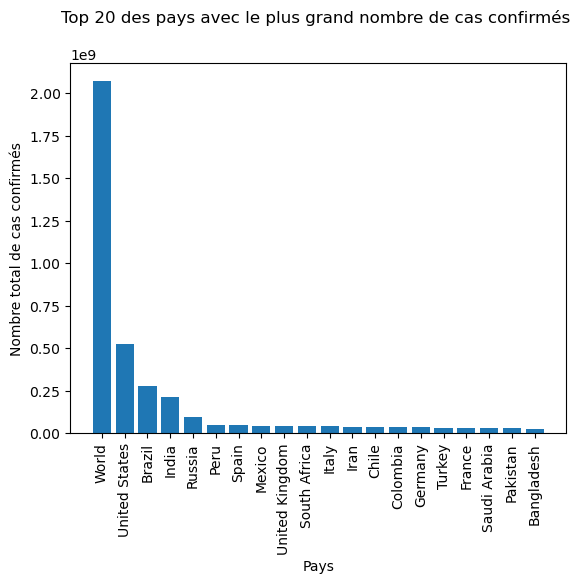

In [10]:
top_20 = data_pays.sort_values('total_cases', ascending=False).head(20)

plt.bar(top_20['location'], top_20['total_cases'])
plt.xticks(rotation=90)
plt.xlabel('Pays')
plt.ylabel('Nombre total de cas confirmés')
plt.title('Top 20 des pays avec le plus grand nombre de cas confirmés \n')
plt.show()

## Avant toutes choses nous voulons savoir comment évolue le taux de mortalité ? En fonction des cas confirmés oui mais pas que, car un cas confirmé n'est pas un décés obligatoire. Et donc qu'est ce qui crée ce taux de mortalité ?

In [11]:
data_covid2 = data_covid.drop(data_covid[data_covid['date'] == '2019-12-31'].index)

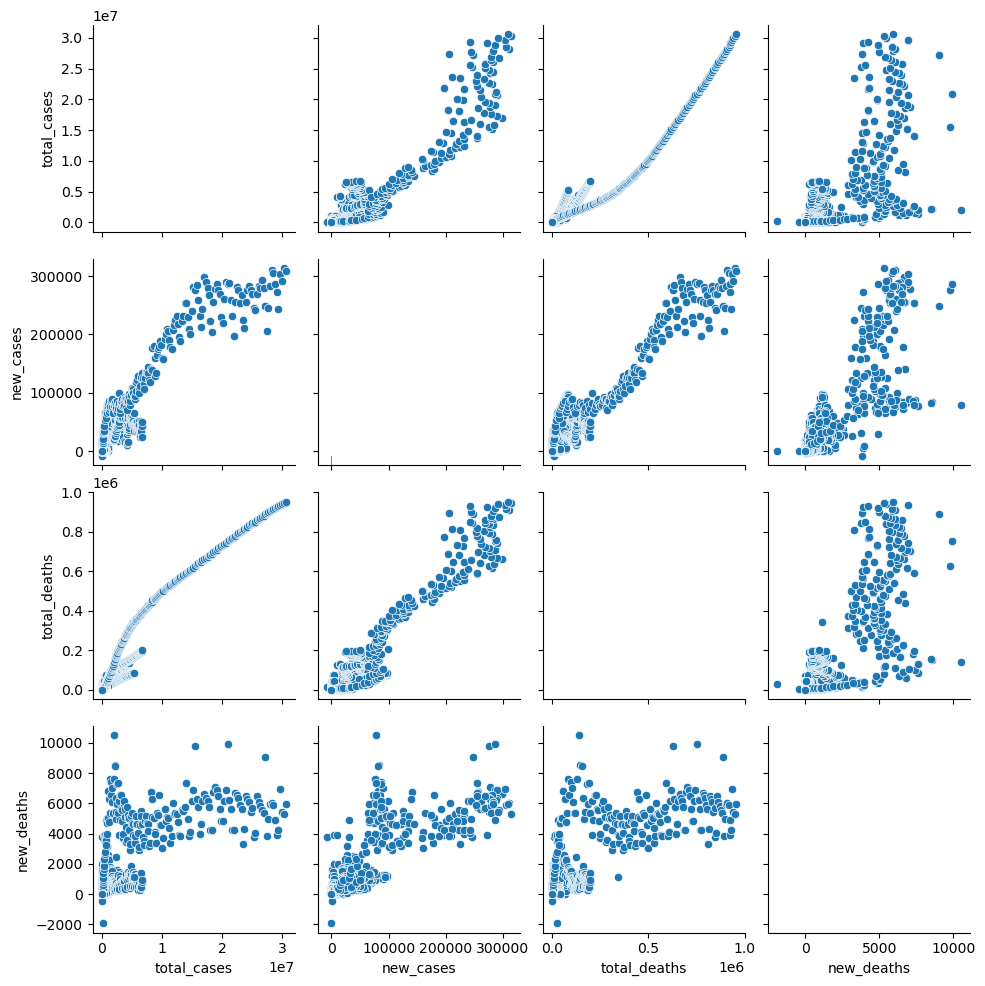

Coefficient de détermination : 0.8992686195220292
Coefficient directeur : [[0.01234538]]


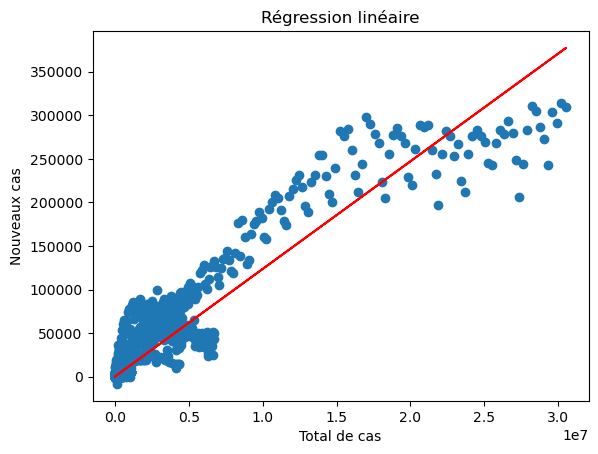

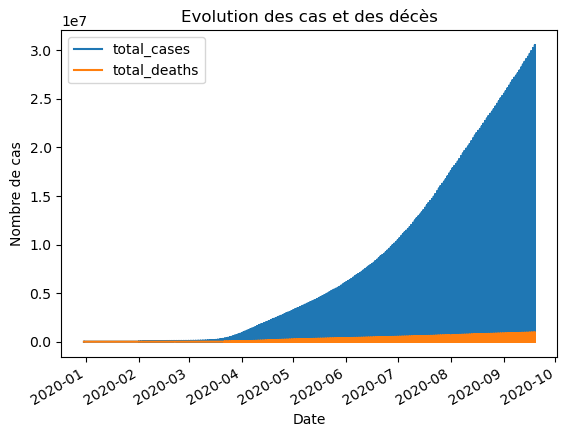

In [12]:
# Préparation des données
df = data_covid
df = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']]
df = df.dropna()

# Analyse exploratoire de données
sns.pairplot(df)
plt.show()

# Régression linéaire pour prédire le nombre de cas
X = df[['total_cases']].values
y = df[['new_cases']].values
reg = LinearRegression().fit(X, y)
print('Coefficient de détermination :', reg.score(X, y))
print('Coefficient directeur :', reg.coef_)

# Visualisation des résultats de la régression linéaire
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.xlabel('Total de cas')
plt.ylabel('Nouveaux cas')
plt.title('Régression linéaire')
plt.show()

# Création d'un graphique pour comparer l'évolution des cas et des décès
df.plot(x='date', y=['total_cases', 'total_deaths'])
plt.xlabel('Date')
plt.ylabel('Nombre de cas')
plt.title('Evolution des cas et des décès')
plt.show()

## D'après ces graphes, nous pouvons voir sur quoi partir déjà. En général, plus le nombre de cas total est haut et plus le taux de mortalité est considérable, l'évolution est assez linéaire, voir même exponentielle.

  iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2019-12-31          0.0        NaN   
1      AFG      Asia  Afghanistan 2020-01-01          0.0        0.0   
2      AFG      Asia  Afghanistan 2020-01-02          0.0        0.0   
3      AFG      Asia  Afghanistan 2020-01-03          0.0        0.0   
4      AFG      Asia  Afghanistan 2020-01-04          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         NaN                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN         

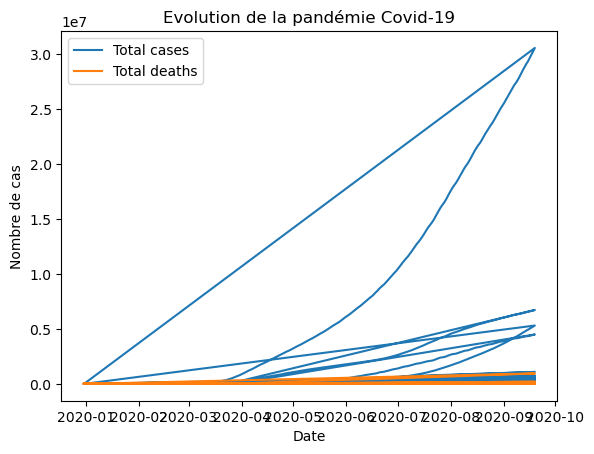

In [13]:
# Création d'une nouvelle colonne pour le nombre de nouveaux cas par jour
data_covid['new_cases'] = data_covid['total_cases'].diff()

# Création d'une nouvelle colonne pour le nombre de nouveaux décès par jour
data_covid['new_deaths'] = data_covid['total_deaths'].diff()

# Affichage des 5 premières lignes du dataframe
print(data_covid.head())

# Graphique de l'évolution des cas et décès au fil du temps
plt.plot(data_covid['date'], data_covid['total_cases'], label='Total cases')
plt.plot(data_covid['date'], data_covid['total_deaths'], label='Total deaths')
plt.xlabel('Date')
plt.ylabel('Nombre de cas')
plt.title('Evolution de la pandémie Covid-19')
plt.legend()
plt.show()

  iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2019-12-31          0.0        NaN   
1      AFG      Asia  Afghanistan 2020-01-01          0.0        0.0   
2      AFG      Asia  Afghanistan 2020-01-02          0.0        0.0   
3      AFG      Asia  Afghanistan 2020-01-03          0.0        0.0   
4      AFG      Asia  Afghanistan 2020-01-04          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         NaN                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN         

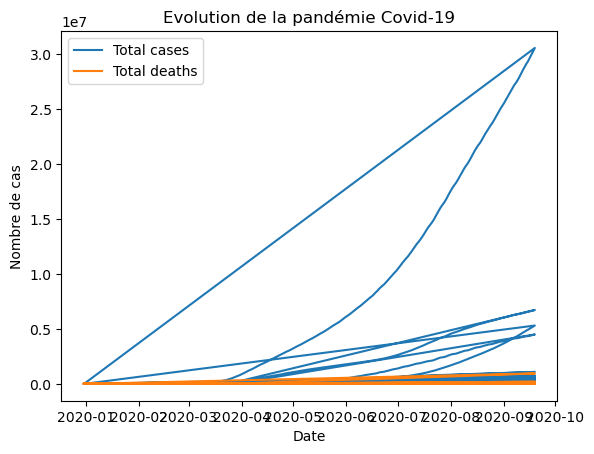

C:\Users\SunRi\AppData\Local\Temp\ipykernel_106240\3971630487.py:20: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  data_covid_country = data_covid.groupby(['continent']).max()[['total_cases', 'total_deaths', 'new_cases', 'new_deaths']].reset_index()


       continent  total_cases  total_deaths  new_cases  new_deaths
3  North America    6724667.0      198589.0    78427.0      4928.0
1           Asia    5308014.0       85619.0    97894.0      2003.0
5  South America    4495183.0      135793.0    69074.0      3935.0
2         Europe    1091186.0       41732.0    27404.0      2004.0
0         Africa     657627.0       15857.0    13944.0       572.0


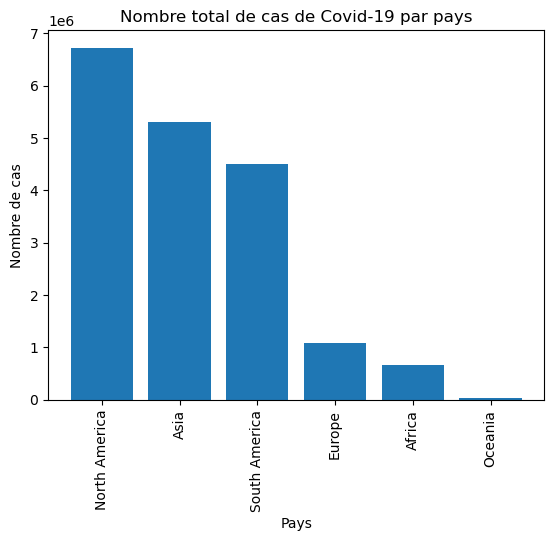

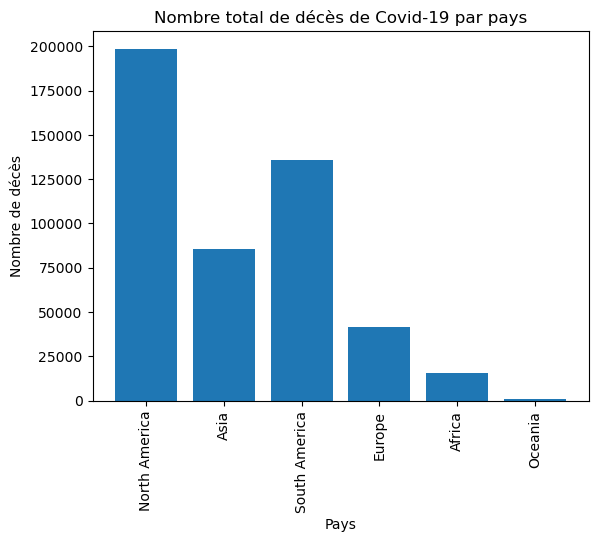

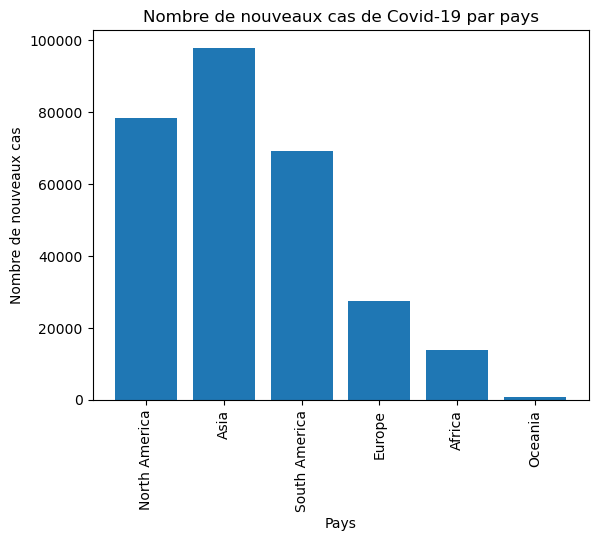

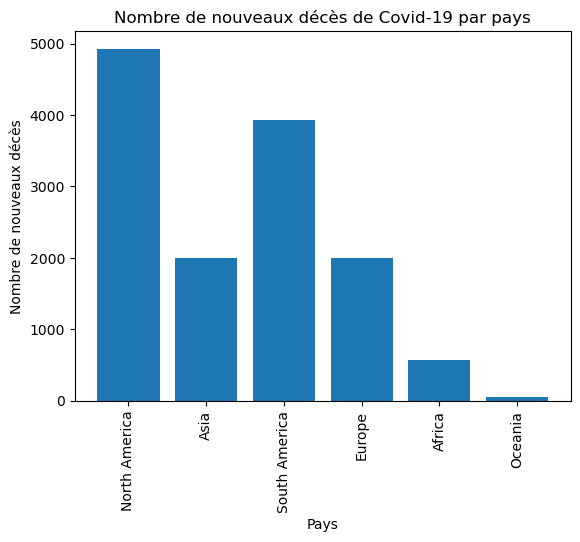

In [14]:
# Création d'une nouvelle colonne pour le nombre de nouveaux cas par jour
data_covid['new_cases'] = data_covid['total_cases'].diff()

# Création d'une nouvelle colonne pour le nombre de nouveaux décès par jour
data_covid['new_deaths'] = data_covid['total_deaths'].diff()

# Affichage des 5 premières lignes du dataframe
print(data_covid.head())

# Graphique de l'évolution des cas et décès au fil du temps
plt.plot(data_covid['date'], data_covid['total_cases'], label='Total cases')
plt.plot(data_covid['date'], data_covid['total_deaths'], label='Total deaths')
plt.xlabel('Date')
plt.ylabel('Nombre de cas')
plt.title('Evolution de la pandémie Covid-19')
plt.legend()
plt.show()

# Groupement des données par pays
data_covid_country = data_covid.groupby(['continent']).max()[['total_cases', 'total_deaths', 'new_cases', 'new_deaths']].reset_index()

# Tri des données par nombre de cas décroissant
data_covid_country = data_covid_country.sort_values(by=['total_cases'], ascending=False)

# Affichage des 5 premières lignes du dataframe
print(data_covid_country.head())

# Graphique du nombre total de cas par pays
plt.bar(data_covid_country['continent'], data_covid_country['total_cases'])
plt.xticks(rotation=90)
plt.xlabel('Pays')
plt.ylabel('Nombre de cas')
plt.title('Nombre total de cas de Covid-19 par pays')
plt.show()

# Graphique du nombre total de décès par pays
plt.bar(data_covid_country['continent'], data_covid_country['total_deaths'])
plt.xticks(rotation=90)
plt.xlabel('Pays')
plt.ylabel('Nombre de décès')
plt.title('Nombre total de décès de Covid-19 par pays')
plt.show()

# Graphique du nombre de nouveaux cas par pays
plt.bar(data_covid_country['continent'], data_covid_country['new_cases'])
plt.xticks(rotation=90)
plt.xlabel('Pays')
plt.ylabel('Nombre de nouveaux cas')
plt.title('Nombre de nouveaux cas de Covid-19 par pays')
plt.show()

# Graphique du nombre de nouveaux décès par pays
plt.bar(data_covid_country['continent'], data_covid_country['new_deaths'])
plt.xticks(rotation=90)
plt.xlabel('Pays')
plt.ylabel('Nombre de nouveaux décès')
plt.title('Nombre de nouveaux décès de Covid-19 par pays')
plt.show()

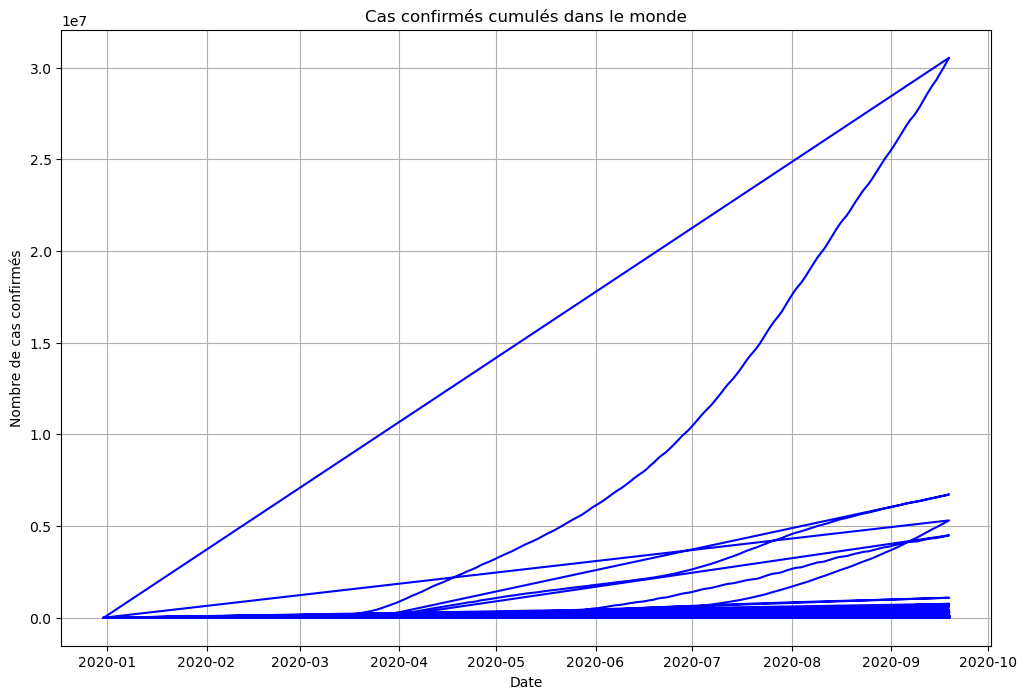

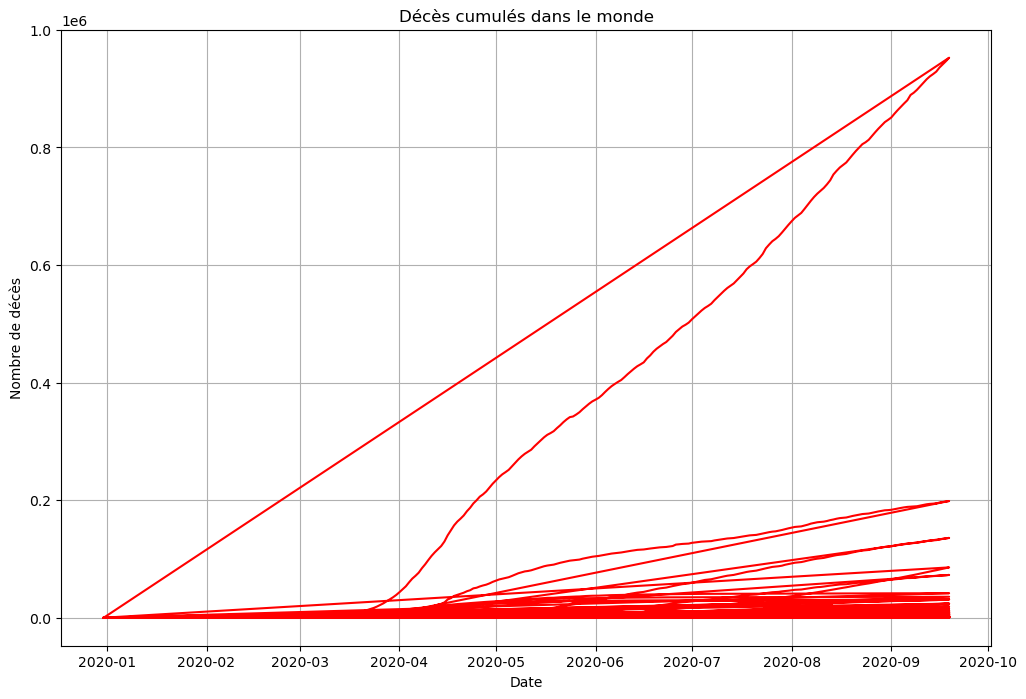

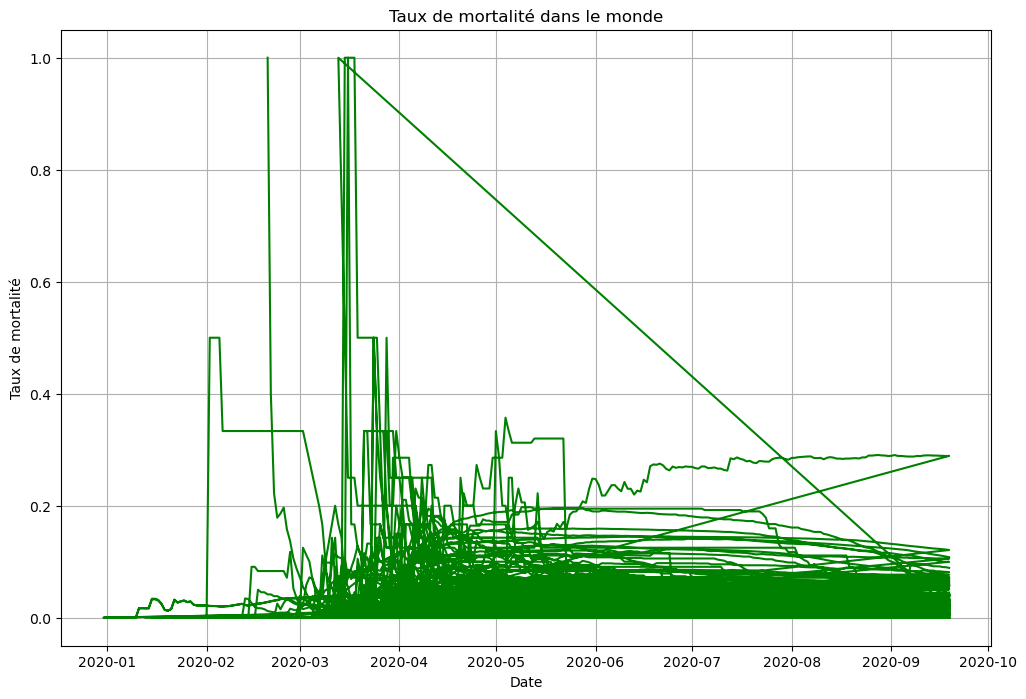

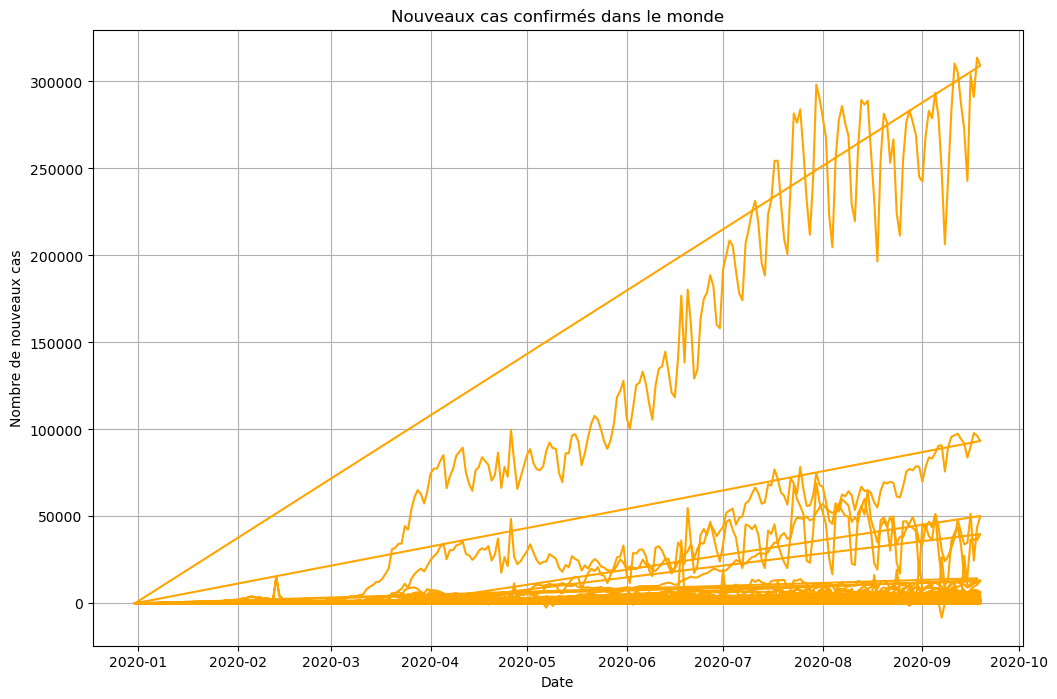

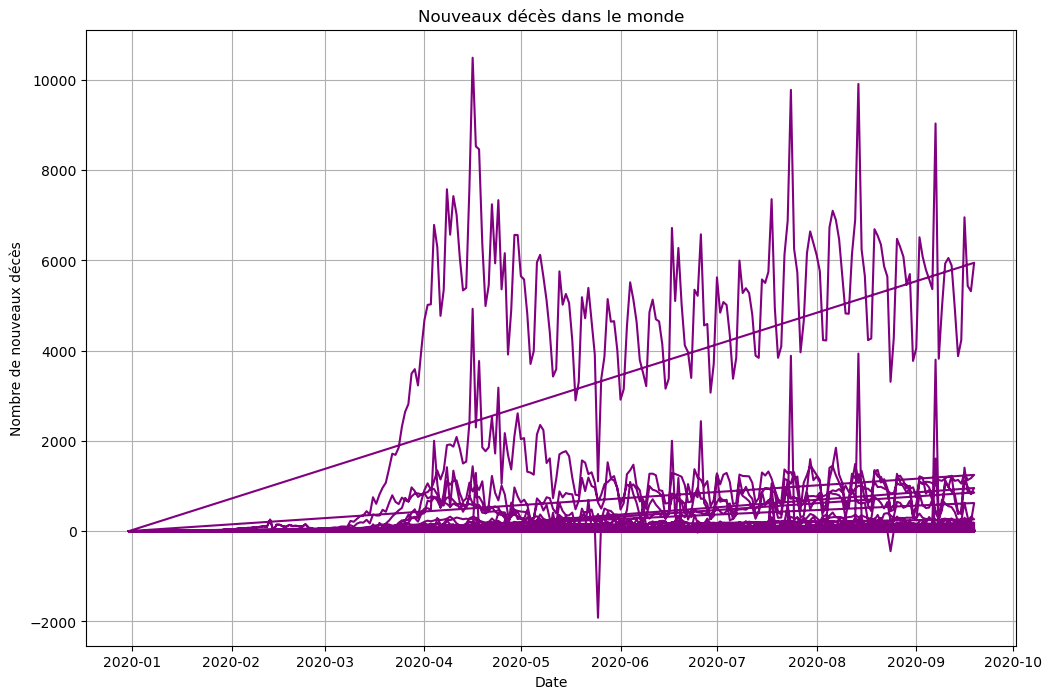

In [15]:
# Graphe des cas confirmés cumulés dans le monde
plt.figure(figsize=(12,8))
plt.plot(df['date'], df['total_cases'], color='blue')
plt.title("Cas confirmés cumulés dans le monde")
plt.xlabel("Date")
plt.ylabel("Nombre de cas confirmés")
plt.grid(True)
plt.show()

# Graphe des décès cumulés dans le monde
plt.figure(figsize=(12,8))
plt.plot(df['date'], df['total_deaths'], color='red')
plt.title("Décès cumulés dans le monde")
plt.xlabel("Date")
plt.ylabel("Nombre de décès")
plt.grid(True)
plt.show()

# Graphe du taux de mortalité dans le monde
plt.figure(figsize=(12,8))
plt.plot(df['date'], df['total_deaths'] / df['total_cases'], color='green')
plt.title("Taux de mortalité dans le monde")
plt.xlabel("Date")
plt.ylabel("Taux de mortalité")
plt.grid(True)
plt.show()

# Graphe des nouveaux cas dans le monde
plt.figure(figsize=(12,8))
plt.plot(df['date'], df['new_cases'], color='orange')
plt.title("Nouveaux cas confirmés dans le monde")
plt.xlabel("Date")
plt.ylabel("Nombre de nouveaux cas")
plt.grid(True)
plt.show()

# Graphe des nouveaux décès dans le monde
plt.figure(figsize=(12,8))
plt.plot(df['date'], df['new_deaths'], color='purple')
plt.title("Nouveaux décès dans le monde")
plt.xlabel("Date")
plt.ylabel("Nombre de nouveaux décès")
plt.grid(True)
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Créer un objet modèle de régression linéaire
regressor = LinearRegression()

# Former le modèle de régression linéaire sur l'ensemble d'entraînement
regressor.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = regressor.predict(X_test)

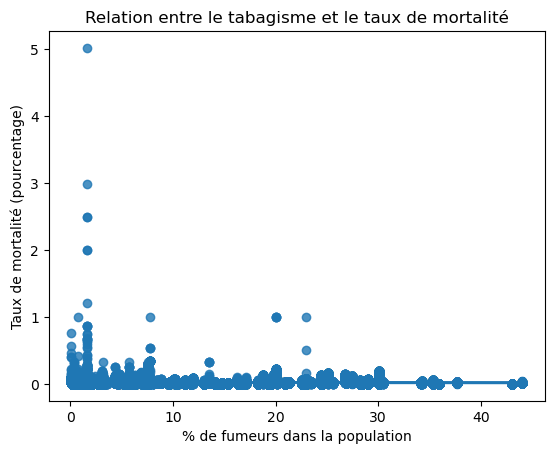

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importer les données depuis le CSV
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

data["smokers_percent"] = pd.concat([data["female_smokers"], data["male_smokers"]],ignore_index=True)

# Sélectionner les colonnes pertinentes pour l'analyse
data = data[['location', 'date', 'total_deaths_per_million', 'total_cases_per_million', 'smokers_percent']]

# Retirer les lignes contenant des valeurs manquantes
data.dropna(inplace=True)

# Convertir la colonne date en type datetime
data['date'] = pd.to_datetime(data['date'])

# Calculer la proportion de décès par rapport aux cas confirmés
data['case_fatality_rate'] = data['total_deaths_per_million'] / data['total_cases_per_million']

# Afficher la corrélation entre le tabagisme et le taux de mortalité
sns.regplot(x='smokers_percent', y='case_fatality_rate', data=data)
plt.title('Relation entre le tabagisme et le taux de mortalité')
plt.xlabel('% de fumeurs dans la population')
plt.ylabel('Taux de mortalité (pourcentage)')
plt.show()

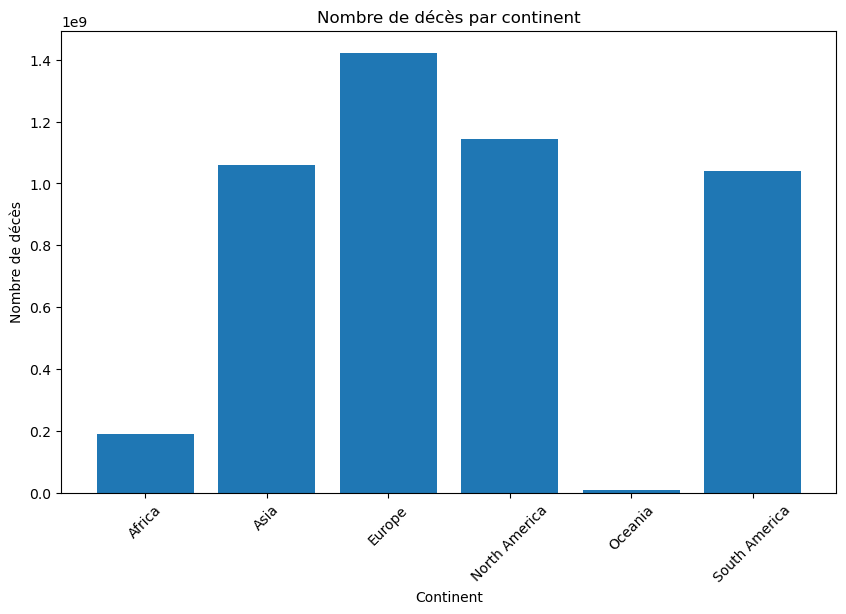

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Importer les données depuis le CSV
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# Sélectionner les colonnes pertinentes pour l'analyse
data = data[['continent', 'location', 'total_deaths']]

# Grouper les données par continent et calculer le nombre total de décès
deaths_by_continent = data.groupby('continent')['total_deaths'].sum().reset_index()

# Créer un graphique à barres pour représenter le nombre de décès par continent
plt.figure(figsize=(10, 6))
plt.bar(deaths_by_continent['continent'], deaths_by_continent['total_deaths'])
plt.title('Nombre de décès par continent')
plt.xlabel('Continent')
plt.ylabel('Nombre de décès')
plt.xticks(rotation=45)
plt.show()

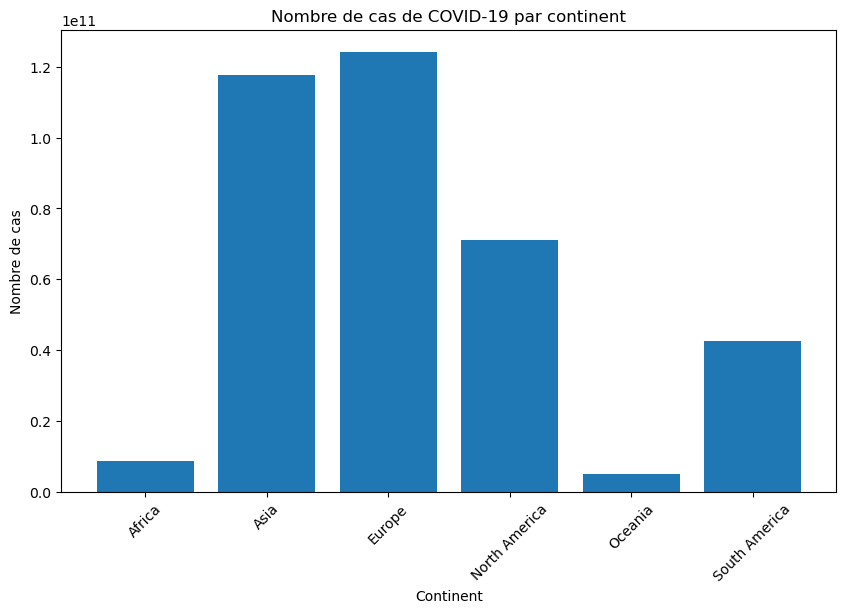

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Importer les données depuis le CSV
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# Sélectionner les colonnes pertinentes pour l'analyse
data = data[['continent', 'location', 'total_cases']]

# Grouper les données par continent et calculer le nombre total de cas
cases_by_continent = data.groupby('continent')['total_cases'].sum().reset_index()

# Créer un graphique à barres pour représenter le nombre de cas par continent
plt.figure(figsize=(10, 6))
plt.bar(cases_by_continent['continent'], cases_by_continent['total_cases'])
plt.title('Nombre de cas de COVID-19 par continent')
plt.xlabel('Continent')
plt.ylabel('Nombre de cas')
plt.xticks(rotation=45)
plt.show()

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import plotly.graph_objects as go
from IPython.display import display

# Importer les données depuis le CSV
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

data["smokers_percent"] = pd.concat([data["female_smokers"], data["male_smokers"]], ignore_index=True) / 2

# Sélectionner les colonnes pertinentes pour l'analyse
data = data[['location', 'date', 'smokers_percent', 'total_cases', 'total_deaths']]

# Retirer les lignes contenant des valeurs manquantes
data.dropna(inplace=True)

# Calculer le taux de mortalité pour chaque pays
data['case_fatality_rate'] = data['total_deaths'] / data['total_cases']

# Convertir la colonne date en type datetime
data['date'] = pd.to_datetime(data['date'])

# Créer une liste des pays uniques dans les données
countries = sorted(data['location'].unique())

# Créer une liste des mois uniques dans les données
months = sorted(data['date'].dt.to_period('M').unique())

# Créer un widget de sélection de pays
country_dropdown = widgets.Dropdown(
    options=countries,
    value=countries[0],
    description='Pays:'
)

# Créer un widget de sélection de date
month_dropdown = widgets.Dropdown(
    options=months,
    value=months[-1],
    description='Mois:'
)

# Fonction de mise à jour du graphique en fonction du pays et du mois sélectionnés
def update_graph(country, month):
    filtered_data = data[(data['location'] == country) & (data['date'].dt.to_period('M') == month)]
    
    fig = go.Figure()
    fig.add_trace(go.Box(
    x=filtered_data['smokers_percent'],
    y=filtered_data['case_fatality_rate'] * 100,  # Multiplier par 100 pour afficher en pourcentage
    text=filtered_data['location'],
    hovertemplate='Pourcentage de fumeurs: %{x}<br>Taux de mortalité: %{y:.2f}%<br>Pays: %{text}',
    marker=dict(color='blue'),
    boxpoints=False
))
    
    fig.update_layout(
        title='Taux de mortalité en fonction du pourcentage de fumeurs - {} ({})'.format(country, month),
        xaxis=dict(title='Pourcentage de fumeurs dans la population'),
        yaxis=dict(title='Taux de mortalité')
    )
    
    fig.show()

# Créer un widget interactif pour la mise à jour du graphique
interactive_widget = widgets.interactive_output(update_graph, {'country': country_dropdown, 'month': month_dropdown})

# Afficher les widgets et le graphique initial
display(country_dropdown, month_dropdown, interactive_widget)

Dropdown(description='Pays:', options=('Albania', 'Algeria', 'Andorra', 'Argentina', 'Armenia', 'Australia', '…

Dropdown(description='Mois:', index=40, options=(Period('2020-01', 'M'), Period('2020-02', 'M'), Period('2020-…

Output()

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import plotly.graph_objects as go
from IPython.display import display

# Importer les données depuis le CSV
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

data["smokers_percent"] = pd.concat([data["female_smokers"], data["male_smokers"]], ignore_index=True) / 2

# Sélectionner les colonnes pertinentes pour l'analyse
data = data[['location', 'date', 'smokers_percent', 'total_cases', 'total_deaths']]

# Retirer les lignes contenant des valeurs manquantes
data.dropna(inplace=True)

# Calculer le taux de mortalité pour chaque pays
data['case_fatality_rate'] = data['total_deaths'] / data['total_cases']

# Convertir la colonne date en type datetime
data['date'] = pd.to_datetime(data['date'])

# Créer une liste des pays uniques dans les données
countries = sorted(data['location'].unique())

# Créer une liste des mois uniques dans les données
months = sorted(data['date'].dt.to_period('M').unique())

# Créer un widget de sélection de pays
country_dropdown = widgets.Dropdown(
    options=countries,
    value=countries[0],
    description='Pays:'
)

# Créer un widget de sélection de date
month_dropdown = widgets.Dropdown(
    options=months,
    value=months[-1],
    description='Mois:'
)

# Fonction de mise à jour du graphique en fonction du pays et du mois sélectionnés
def update_graph(country, month):
    filtered_data = data[(data['location'] == country) & (data['date'].dt.to_period('M') == month)]
    
    fig = go.Figure()
    fig.add_trace(go.Box(
    x=filtered_data['smokers_percent'],
    y=filtered_data['case_fatality_rate'] * 100,  # Multiplier par 100 pour afficher en pourcentage
    text=filtered_data['location'],
    hovertemplate='Pourcentage de fumeurs: %{x}<br>Taux de mortalité: %{y:.2f}%<br>Pays: %{text}',
    marker=dict(color='blue'),
    boxpoints=False
))
    
    fig.update_layout(
        title='Taux de mortalité en fonction du pourcentage de fumeurs - {} ({})'.format(country, month),
        xaxis=dict(title='Pourcentage de fumeurs dans la population'),
        yaxis=dict(title='Taux de mortalité')
    )
    
    fig.show()

# Créer un widget interactif pour la mise à jour du graphique
interactive_widget = widgets.interactive_output(update_graph, {'country': country_dropdown, 'month': month_dropdown})

# Afficher les widgets et le graphique initial
display(country_dropdown, month_dropdown, interactive_widget)

Dropdown(description='Pays:', options=('Albania', 'Algeria', 'Andorra', 'Argentina', 'Armenia', 'Australia', '…

Dropdown(description='Mois:', index=40, options=(Period('2020-01', 'M'), Period('2020-02', 'M'), Period('2020-…

Output()

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Importer les données depuis le CSV
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

data["smokers_percent"] = pd.concat([data["female_smokers"], data["male_smokers"]], ignore_index=True)

# Sélectionner les colonnes pertinentes pour l'analyse
data = data[['continent', 'date', 'smokers_percent', 'total_cases', 'total_deaths']]

# Retirer les lignes contenant des valeurs manquantes
data.dropna(inplace=True)

# Calculer le taux de mortalité pour chaque pays
data['case_fatality_rate'] = data['total_deaths'] / data['total_cases']

# Convertir la colonne date en type datetime
data['date'] = pd.to_datetime(data['date'])

# Créer une liste des pays uniques dans les données
continent = sorted(data['continent'].unique())

# Créer une liste des mois uniques dans les données
months = sorted(data['date'].dt.to_period('M').unique())

# Créer un widget de sélection de pays
continent_dropdown = widgets.Dropdown(
    options=continent,
    value=continent[0],
    description='Pays:'
)

# Créer un widget de sélection de date
month_dropdown = widgets.Dropdown(
    options=months,
    value=months[-1],
    description='Mois:'
)

# Fonction de mise à jour du graphique en fonction du pays et du mois sélectionnés
def update_graph(continent, month):
    filtered_data = data[(data['continent'] == continent) & (data['date'].dt.to_period('M') == month)]
    sns.boxplot(x='smokers_percent', y='case_fatality_rate', data=filtered_data)
    plt.title('Taux de mortalité en fonction du pourcentage de fumeurs - {} ({})'.format(continent, month))
    plt.xlabel('Pourcentage de fumeurs dans la population')
    plt.ylabel('Taux de mortalité')
    plt.show()

# Créer un widget interactif pour la mise à jour du graphique
interactive_widget = widgets.interactive_output(update_graph, {'continent': continent_dropdown, 'month': month_dropdown})

# Afficher les widgets et le graphique initial
display(continent_dropdown, month_dropdown, interactive_widget)

Dropdown(description='Pays:', options=('Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'…

Dropdown(description='Mois:', index=40, options=(Period('2020-01', 'M'), Period('2020-02', 'M'), Period('2020-…

Output()

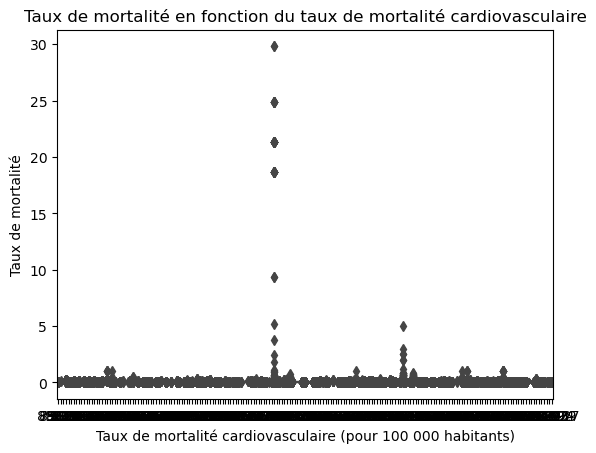

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importer les données depuis le CSV
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# Sélectionner les colonnes pertinentes pour l'analyse
data = data[['location', 'cardiovasc_death_rate', 'total_cases', 'total_deaths']]

# Retirer les lignes contenant des valeurs manquantes
data.dropna(inplace=True)

# Calculer le taux de mortalité pour chaque pays
data['case_fatality_rate'] = data['total_deaths'] / data['total_cases']

# Comparer le taux de mortalité des personnes avec et sans maladies cardiovasculaires
sns.boxplot(x='cardiovasc_death_rate', y='case_fatality_rate', data=data)
plt.title('Taux de mortalité en fonction du taux de mortalité cardiovasculaire')
plt.xlabel('Taux de mortalité cardiovasculaire (pour 100 000 habitants)')
plt.ylabel('Taux de mortalité')
plt.show()

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Importer les données depuis le CSV
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# Sélectionner les colonnes pertinentes pour l'analyse
data = data[['location', 'continent', 'total_deaths', 'gdp_per_capita', 'extreme_poverty']]

# Retirer les lignes contenant des valeurs manquantes
data.dropna(inplace=True)

# Créer une liste des continents uniques dans les données
continents = sorted(data['continent'].unique())

# Créer un widget de sélection de continent
continent_dropdown = widgets.Dropdown(
    options=continents,
    value=continents[0],
    description='Continent:'
)

# Fonction de mise à jour du graphique en fonction du continent sélectionné
def update_graph(continent):
    filtered_data = data[data['continent'] == continent]
    
    # Comparer le nombre de décès en fonction du PIB par habitant
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='location', y='total_deaths', data=filtered_data)
    plt.title('Nombre de décès par le COVID-19 en fonction du PIB par habitant - {}'.format(continent))
    plt.xlabel('Pays')
    plt.ylabel('Nombre de décès')
    plt.xticks(rotation=90)
    plt.show()

# Créer un widget interactif pour la mise à jour du graphique
interactive_widget = widgets.interactive_output(update_graph, {'continent': continent_dropdown})

# Afficher le widget de sélection de continent et le graphique initial
display(continent_dropdown, interactive_widget)

Dropdown(description='Continent:', options=('Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South Ame…

Output()

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Importer les données depuis le CSV
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# Sélectionner les colonnes pertinentes pour l'analyse
data = data[['location', 'continent', 'gdp_per_capita']]

# Retirer les lignes contenant des valeurs manquantes
data.dropna(inplace=True)

# Créer une liste des continents uniques dans les données
continents = sorted(data['continent'].unique())

# Créer un widget de sélection de continent
continent_dropdown = widgets.Dropdown(
    options=continents,
    value=continents[0],
    description='Continent:'
)

# Fonction de mise à jour du graphique en fonction du continent sélectionné
def update_graph(continent):
    filtered_data = data[data['continent'] == continent]
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='location', y='gdp_per_capita', data=filtered_data)
    plt.title('PIB par habitant par pays - {}'.format(continent))
    plt.xlabel('Pays')
    plt.ylabel('PIB par habitant')
    plt.xticks(rotation=90)
    plt.show()

# Créer un widget interactif pour la mise à jour du graphique
interactive_widget = widgets.interactive_output(update_graph, {'continent': continent_dropdown})

# Afficher le widget de sélection de continent et le graphique initial
display(continent_dropdown, interactive_widget)

C:\Users\SunRi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: DtypeWarning:

Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.



Dropdown(description='Continent:', options=('Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South Ame…

Output()

In [23]:
data = data_covid[['location', 'continent', 'total_cases']]

# Regrouper les données par pays et continent et calculer le nombre total de cas
data_grouped = data.groupby(['location', 'continent']).sum().reset_index()

# Créer le graphique de carte
fig = px.choropleth(data_frame=data_grouped,
                    locations='location',
                    locationmode='country names',
                    color='total_cases',
                    hover_name='location',
                    hover_data=['continent', 'total_cases'],
                    title='Nombre total de cas par pays',
                    color_continuous_scale='YlOrRd')

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))

# Afficher le graphique
fig.show()

In [24]:
# Sélectionner les colonnes pertinentes
selected_columns = ['continent', 'location', 'date', 'total_cases', 'cardiovasc_death_rate',
                    'diabetes_prevalence', 'female_smokers', 'male_smokers']
filtered_data = data_covid[selected_columns]

# Convertir la colonne 'date' en format de date
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Grouper les données par mois et par pays, puis calculer le nombre total de cas
grouped_data = filtered_data.groupby([filtered_data['date'].dt.year, filtered_data['date'].dt.month, 'location']).sum()
grouped_data.reset_index(inplace=True)
grouped_data.rename(columns={'date': 'year', 'level_1': 'month'}, inplace=True)

# Afficher les données groupées
print(grouped_data)

C:\Users\SunRi\AppData\Local\Temp\ipykernel_106240\2635392616.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: cannot insert date, already exists

In [25]:
# Sélectionner les colonnes pertinentes
selected_columns = ['continent', 'location', 'date', 'total_cases', 'cardiovasc_death_rate',
                    'diabetes_prevalence', 'female_smokers', 'male_smokers']
filtered_data = data_covid[['continent', 'location', 'date', 'total_cases', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers']].copy()

# Convertir la colonne 'date' en format de date
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

filtered_data.loc[:, 'year'] = filtered_data['date'].dt.year
filtered_data.loc[:, 'month'] = filtered_data['date'].dt.month

# Grouper les données par mois et par pays, puis calculer le nombre total de cas
grouped_data = filtered_data.groupby(['year', 'month', 'location']).sum()
grouped_data.reset_index(inplace=True)

# Afficher les données groupées
print(grouped_data)

      year  month        location  total_cases  cardiovasc_death_rate  \
0     2019     12     Afghanistan          0.0                597.029   
1     2019     12         Algeria          0.0                278.364   
2     2019     12         Armenia          0.0                341.010   
3     2019     12       Australia          0.0                107.791   
4     2019     12         Austria          0.0                145.183   
...    ...    ...             ...          ...                    ...   
1679  2020      9  Western Sahara      14554.0                  0.000   
1680  2020      9           World  531622462.0               4428.330   
1681  2020      9           Yemen      37947.0               9405.057   
1682  2020      9          Zambia     249358.0               4455.481   
1683  2020      9        Zimbabwe     137089.0               5849.074   

      diabetes_prevalence  female_smokers  male_smokers  
0                    9.59           0.000         0.000  
1      

In [34]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Filtrer les données par pays et date
filtered_data = data_covid[['continent', 'location', 'date', 'total_cases']].copy()

# Convertir la colonne 'date' en format de date
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Créer une liste des dates uniques dans les données
dates = sorted(filtered_data['date'].dt.date.unique())

# Créer un widget de sélection de date
date_slider = widgets.SelectionSlider(
    options=dates,
    value=dates[-1],  # Sélectionner la dernière date par défaut
    description='Date:',
    continuous_update=False
)

# Fonction de mise à jour du graphique en fonction de la date sélectionnée
def update_graph(date):
    filtered_data_date = filtered_data[filtered_data['date'].dt.date == date]
    fig = px.choropleth(filtered_data_date, 
                        locations='location', 
                        locationmode='country names',
                        color='total_cases',
                        hover_name='location',
                        hover_data=['total_cases'],
                        color_continuous_scale='YlOrRd',
                        title='Nombre total de cas par pays')
    fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
    display(fig)

# Afficher le widget et le graphique initial
display(date_slider)
widgets.interactive_output(update_graph, {'date': date_slider})

SelectionSlider(continuous_update=False, description='Date:', index=263, options=(datetime.date(2019, 12, 31),…

Output()

In [27]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Filtrer les données par pays et date
filtered_data = data_covid[['continent', 'location', 'date', 'total_cases']].copy()

# Convertir la colonne 'date' en format de date
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Créer une liste des dates uniques dans les données
dates = sorted(filtered_data['date'].dt.date.unique())

# Créer un widget de sélection de date
date_dropdown = widgets.Dropdown(
    options=dates,
    value=dates[-1],  # Sélectionner la dernière date par défaut
    description='Date:',
    style={'description_width': 'initial'}
)

# Fonction de mise à jour du graphique en fonction de la date sélectionnée
def update_graph(date):
    filtered_data_date = filtered_data[filtered_data['date'].dt.date == date]
    fig = px.choropleth(filtered_data_date, 
                        locations='location', 
                        locationmode='country names',
                        color='total_cases',
                        hover_name='location',
                        hover_data=['total_cases'],
                        color_continuous_scale='YlOrRd',
                        title='Nombre total de cas par pays')
    fig.show()

# Lier la mise à jour du graphique à la valeur du sélecteur de date
widgets.interact(update_graph, date=date_dropdown)

interactive(children=(Dropdown(description='Date:', index=263, options=(datetime.date(2019, 12, 31), datetime.…

<function __main__.update_graph(date)>

In [28]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Filtrer les données par pays et date
filtered_data = data_covid[['continent', 'location', 'date', 'total_cases']].copy()

# Convertir la colonne 'date' en format de date
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Extraire les mois et les années uniques dans les données
months = sorted(filtered_data['date'].dt.month.unique())
years = sorted(filtered_data['date'].dt.year.unique())

# Créer des widgets de sélection pour le mois et l'année
month_dropdown = widgets.Dropdown(
    options=months,
    value=months[-1],  # Sélectionner le dernier mois par défaut
    description='Mois:',
    style={'description_width': 'initial'}
)

year_dropdown = widgets.Dropdown(
    options=years,
    value=years[-1],  # Sélectionner la dernière année par défaut
    description='Année:',
    style={'description_width': 'initial'}
)

# Fonction de mise à jour du graphique en fonction du mois et de l'année sélectionnés
def update_graph(month, year):
    filtered_data_month_year = filtered_data[(filtered_data['date'].dt.month == month) & (filtered_data['date'].dt.year == year)]
    fig = px.choropleth(filtered_data_month_year, 
                        locations='location', 
                        locationmode='country names',
                        color='total_cases',
                        hover_name='location',
                        hover_data=['total_cases'],
                        color_continuous_scale='YlOrRd',
                        title='Nombre total de cas par pays')
    fig.show()

# Lier la mise à jour du graphique aux valeurs des menus déroulants du mois et de l'année
widgets.interact(update_graph, month=month_dropdown, year=year_dropdown)

interactive(children=(Dropdown(description='Mois:', index=9, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 12), style=De…

<function __main__.update_graph(month, year)>

In [66]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Charger le dataset depuis l'URL
data_covid = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# Filtrer les données par pays et date
filtered_data = data_covid[['continent', 'location', 'date', 'total_cases']].copy()

# Convertir la colonne 'date' en format de date
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Créer une liste des mois uniques dans les données
months = sorted(filtered_data['date'].dt.to_period('M').unique().astype(str))

# Créer un widget de sélection de mois
month_dropdown = widgets.Dropdown(
    options=months,
    value=months[-1],  # Sélectionner le dernier mois par défaut
    description='Mois:',
    style={'description_width': 'initial'}
)

# Fonction de mise à jour du graphique en fonction du mois sélectionné
def update_graph(month):
    filtered_data_month = filtered_data[filtered_data['date'].dt.to_period('M').astype(str) == month]
    fig = px.choropleth(filtered_data_month, 
                        locations='location', 
                        locationmode='country names',
                        color='total_cases',
                        hover_name='location',
                        hover_data=['total_cases'],
                        color_continuous_scale='YlOrRd',
                        title='Nombre total de cas par pays - {}'.format(month))
    fig.show()

# Lier la mise à jour du graphique à la valeur du sélecteur de mois
widgets.interact(update_graph, month=month_dropdown)

interactive(children=(Dropdown(description='Mois:', index=40, options=('2020-01', '2020-02', '2020-03', '2020-…

<function __main__.update_graph(month)>

C:\Users\SunRi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: DtypeWarning:

Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.



<Figure size 1000x600 with 0 Axes>

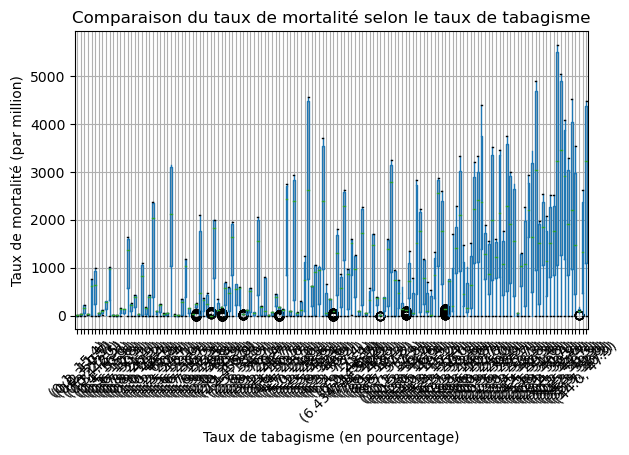

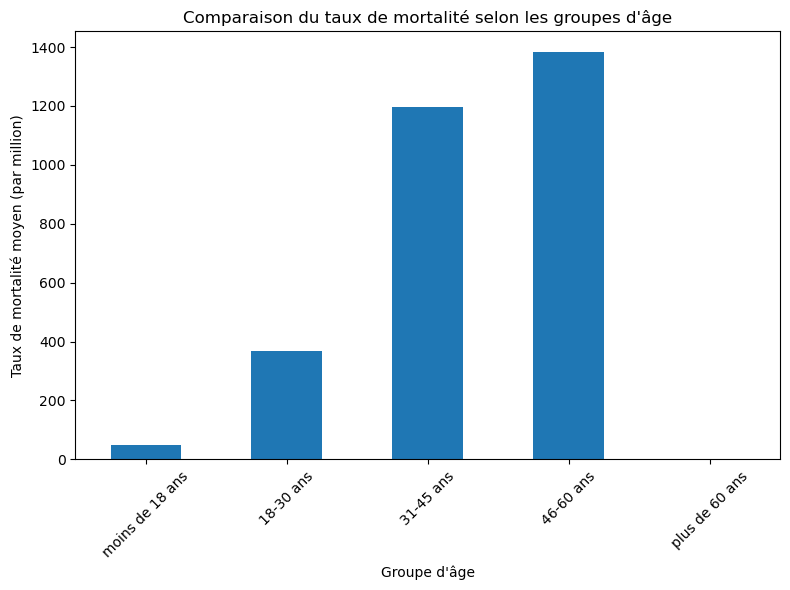

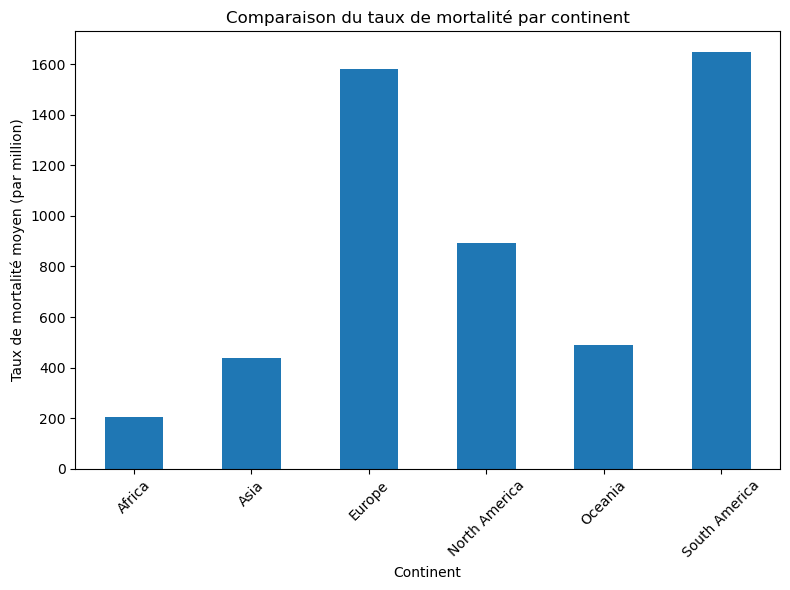

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le jeu de données
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# Filtrer les données pour inclure uniquement les variables pertinentes (taux de mortalité et taux de tabagisme)
filtered_data = data[['location', 'total_deaths_per_million', 'female_smokers', 'male_smokers', 'median_age']]

# Supprimer les lignes avec des valeurs manquantes
filtered_data = filtered_data.dropna()

# Création des groupes d'âge
bins = [0, 18, 30, 45, 60, 200]
labels = ['moins de 18 ans', '18-30 ans', '31-45 ans', '46-60 ans', 'plus de 60 ans']
filtered_data['age_group'] = pd.cut(filtered_data['median_age'], bins=bins, labels=labels)

# Graphique 1 - Comparaison du taux de mortalité global
plt.figure(figsize=(10, 6))
filtered_data.boxplot(column='total_deaths_per_million', by=['female_smokers', 'male_smokers'])
plt.xlabel('Taux de tabagisme (en pourcentage)')
plt.ylabel('Taux de mortalité (par million)')
plt.title('Comparaison du taux de mortalité selon le taux de tabagisme')
plt.suptitle('')  # Supprimer le titre automatique ajouté par pandas
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graphique 2 - Répartition des décès par groupe d'âge
age_group_deaths = filtered_data.groupby('age_group')['total_deaths_per_million'].mean()
plt.figure(figsize=(8, 6))
age_group_deaths.plot(kind='bar')
plt.xlabel('Groupe d\'âge')
plt.ylabel('Taux de mortalité moyen (par million)')
plt.title('Comparaison du taux de mortalité selon les groupes d\'âge')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graphique 3 - Comparaison du taux de mortalité par continent
continent_deaths = data.groupby('continent')['total_deaths_per_million'].mean()
plt.figure(figsize=(8, 6))
continent_deaths.plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Taux de mortalité moyen (par million)')
plt.title('Comparaison du taux de mortalité par continent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\SunRi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: DtypeWarning:

Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.



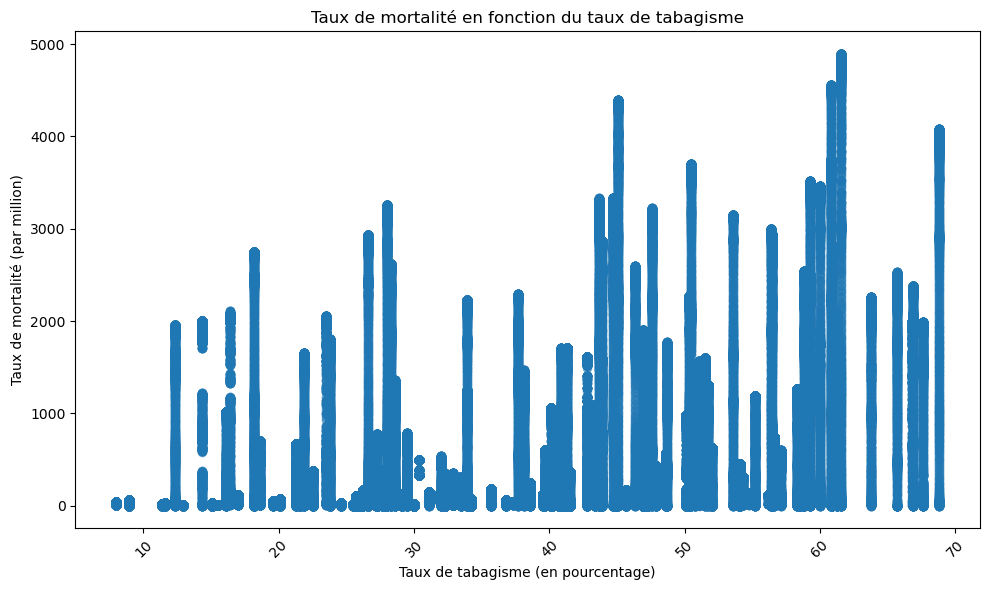

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le jeu de données
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# Filtrer les données pour inclure uniquement les variables pertinentes (taux de mortalité et taux de tabagisme)
filtered_data = data[['location', 'total_deaths_per_million', 'female_smokers', 'male_smokers']]

# Supprimer les lignes avec des valeurs manquantes
filtered_data = filtered_data.dropna()

# Création d'une colonne pour le taux de tabagisme global
filtered_data['overall_smokers'] = filtered_data['female_smokers'] + filtered_data['male_smokers']

# Supprimer les pays avec des valeurs aberrantes pour une meilleure visualisation
filtered_data = filtered_data[filtered_data['overall_smokers'] <= 70]

# Graphique - Taux de mortalité en fonction du taux de tabagisme
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['overall_smokers'], filtered_data['total_deaths_per_million'], alpha=0.5)
plt.xlabel('Taux de tabagisme (en pourcentage)')
plt.ylabel('Taux de mortalité (par million)')
plt.title('Taux de mortalité en fonction du taux de tabagisme')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

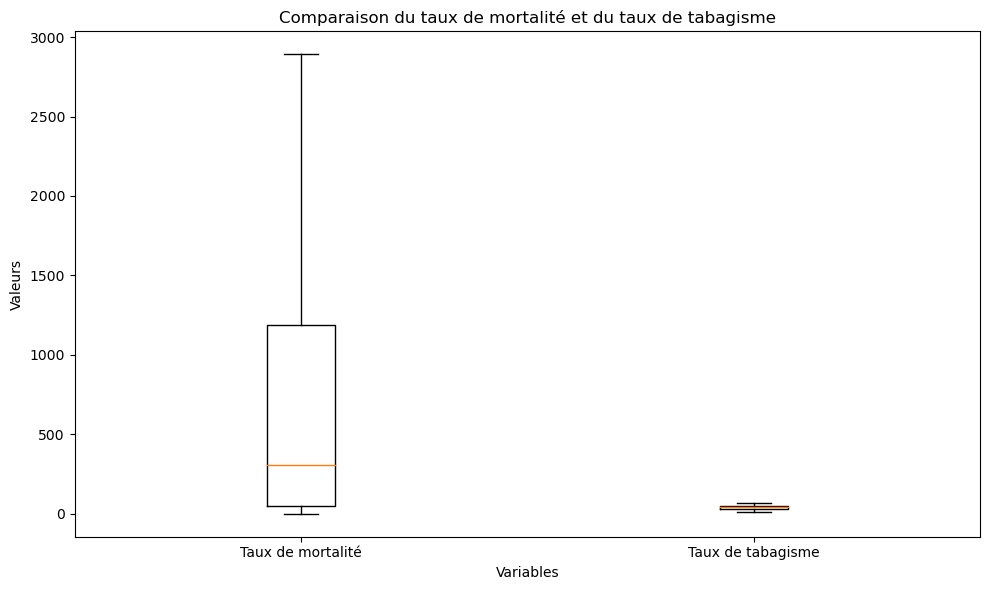

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le jeu de données
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# Filtrer les données pour inclure uniquement les variables pertinentes (taux de mortalité et taux de tabagisme)
filtered_data = data[['location', 'total_deaths_per_million', 'female_smokers', 'male_smokers']]

# Supprimer les lignes avec des valeurs manquantes
filtered_data = filtered_data.dropna()

# Création d'une colonne pour le taux de tabagisme global
filtered_data['overall_smokers'] = filtered_data['female_smokers'] + filtered_data['male_smokers']

# Supprimer les pays avec des valeurs aberrantes pour une meilleure visualisation
filtered_data = filtered_data[filtered_data['overall_smokers'] <= 70]

# Graphique - Taux de mortalité en fonction du taux de tabagisme
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_data['total_deaths_per_million'], positions=[1], labels=['Taux de mortalité'], showfliers=False)
plt.boxplot(filtered_data['overall_smokers'], positions=[2], labels=['Taux de tabagisme'], showfliers=False)
plt.xlabel('Variables')
plt.ylabel('Valeurs')
plt.title('Comparaison du taux de mortalité et du taux de tabagisme')
plt.tight_layout()
plt.show()


#         

# ICI COMMENCE LE PROJET 

# 

# Introduction :
### La pandémie de COVID-19 a eu un impact majeur sur la santé publique à travers le monde. Une question qui s'est posée est de savoir si le tabagisme a influencé le taux de mortalité pendant cette période. Dans cette analyse, nous avons examiné les données disponibles pour déterminer si le tabac a eu un impact sur la mortalité liée au COVID-19.

# Problématique :
## Le tabac a-t-il aidé à l'augmentation des cas de COVID-19 ainsi que l'augmentation du taux de mortalité lié au COVID-19 ?

# Analyse des données :
### Pour cette étude, nous avons utilisé une base de données internationale qui recueille des informations sur les cas confirmés de COVID-19 ainsi que les décès associés. Nous avons également recueilli des données sur les habitudes tabagiques des hommes et des femmes fumeurs de la population pour chaque région. Les données ont été collectées sur une période de trois ans (début à ~ fin covid).

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
import seaborn as sns
import ipywidgets as widgets
import plotly.graph_objects as go
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [124]:
data_test = pd.read_csv("owid-covid-data.csv",delimiter = ",")
data_test

iso_code continent       location        date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan  2019-12-31          0.0        0.0   
1          AFG      Asia    Afghanistan  2020-01-01          0.0        0.0   
2          AFG      Asia    Afghanistan  2020-01-02          0.0        0.0   
3          AFG      Asia    Afghanistan  2020-01-03          0.0        0.0   
4          AFG      Asia    Afghanistan  2020-01-04          0.0        0.0   
...        ...       ...            ...         ...          ...        ...   
44780      NaN       NaN  International  2020-09-15        696.0        NaN   
44781      NaN       NaN  International  2020-09-16        696.0        NaN   
44782      NaN       NaN  International  2020-09-17        696.0        NaN   
44783      NaN       NaN  International  2020-09-18        696.0        NaN   
44784      NaN       NaN  International  2020-09-19        696.0        NaN   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                     NaN           0.0         0.0                  NaN  ...   
1                     NaN           0.0         0.0                  NaN  ...   
2                     NaN           0.0         0.0                  NaN  ...   
3                     NaN           0.0         0.0                  NaN  ...   
4                     NaN           0.0         0.0                  NaN  ...   
...                   ...           ...         ...                  ...  ...   
44780                 NaN           7.0         NaN                  NaN  ...   
44781                 NaN           7.0         NaN                  NaN  ...   
44782                 NaN           7.0         NaN                  NaN  ...   
44783                 NaN           7.0         NaN                  NaN  ...   
44784                 NaN           7.0         NaN                  NaN  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0            1803.987              NaN                597.029   
1            1803.987              NaN                597.029   
2            1803.987              NaN                597.029   
3            1803.987              NaN                597.029   
4            1803.987              NaN                597.029   
...               ...              ...                    ...   
44780             NaN              NaN                    NaN   
44781             NaN              NaN                    NaN   
44782             NaN              NaN                    NaN   
44783             NaN              NaN                    NaN   
44784             NaN              NaN                    NaN   

       diabetes_prevalence  female_smokers  male_smokers  \
0                     9.59             NaN           NaN   
1                     9.59             NaN           NaN   
2                     9.59             NaN           NaN   
3                     9.59             NaN           NaN   
4                     9.59             NaN           NaN   
...                    ...             ...           ...   
44780                  NaN             NaN           NaN   
44781                  NaN             NaN           NaN   
44782                  NaN             NaN           NaN   
44783                  NaN             NaN           NaN   
44784                  NaN             NaN           NaN   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                      37.746                         0.5            64.83   
1                      37.746                         0.5            64.83   
2                      37.746                         0.5            64.83   
3                      37.746                         0.5            64.83   
4                      37.746                         0.5            64.83   
...                       ...                         ...              ...   
44780                     NaN       

## Ci-dessous, toutes les colonnes présentes dans le dataset 

In [125]:
colonnes = data_test.columns
print(colonnes)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')


## Et enfin, le dataset final utilisé pour ce projet càd uniquement les données qui nous intéressent

In [126]:
data_tabac = data_test[['continent','location','date','total_cases','total_deaths','female_smokers','male_smokers']]
data_tabac

continent       location        date  total_cases  total_deaths  \
0          Asia    Afghanistan  2019-12-31          0.0           0.0   
1          Asia    Afghanistan  2020-01-01          0.0           0.0   
2          Asia    Afghanistan  2020-01-02          0.0           0.0   
3          Asia    Afghanistan  2020-01-03          0.0           0.0   
4          Asia    Afghanistan  2020-01-04          0.0           0.0   
...         ...            ...         ...          ...           ...   
44780       NaN  International  2020-09-15        696.0           7.0   
44781       NaN  International  2020-09-16        696.0           7.0   
44782       NaN  International  2020-09-17        696.0           7.0   
44783       NaN  International  2020-09-18        696.0           7.0   
44784       NaN  International  2020-09-19        696.0           7.0   

       female_smokers  male_smokers  
0                 NaN           NaN  
1                 NaN           NaN  
2                 NaN           NaN  
3                 NaN           NaN  
4                 NaN           NaN  
...               ...           ...  
44780             NaN           NaN  
44781             NaN           NaN  
44782             NaN           NaN  
44783             NaN           NaN  
44784             NaN           NaN  

[44785 rows x 7 columns]

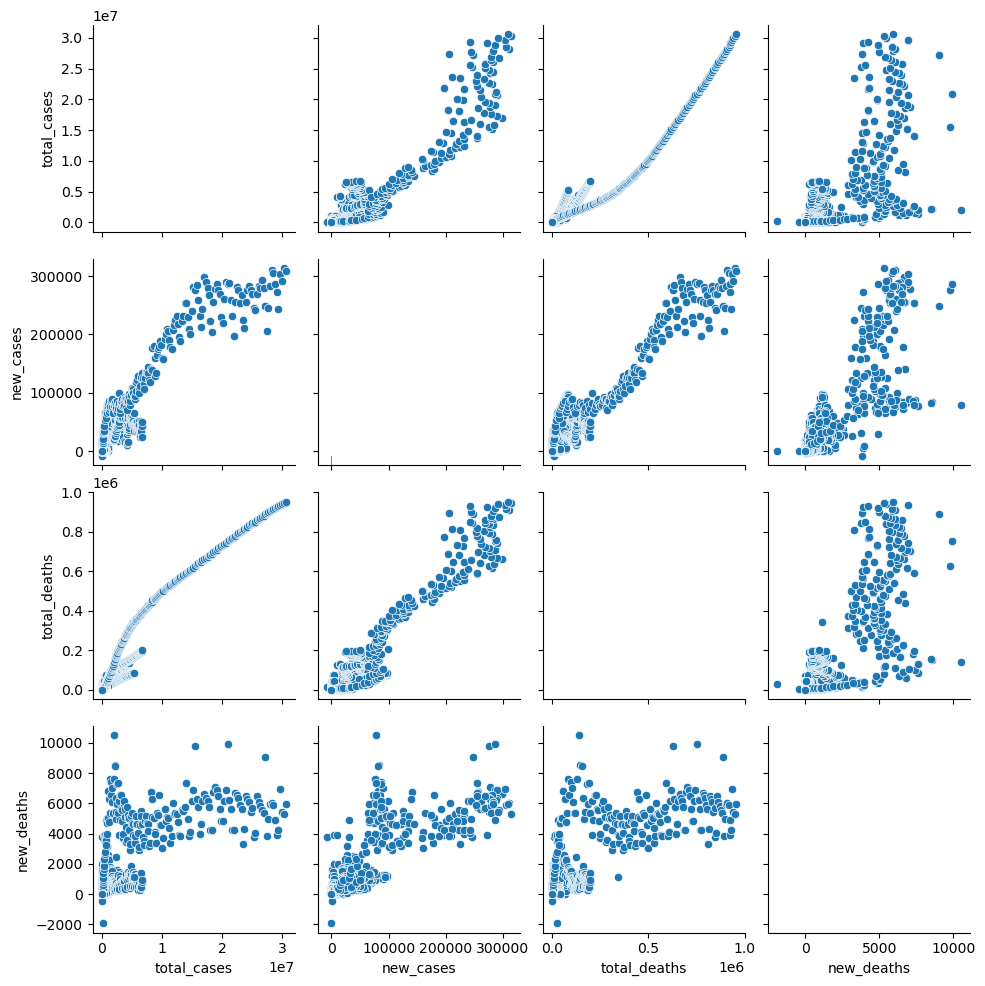

Coefficient de détermination : 0.8992686195220292
Coefficient directeur : [[0.01234538]]


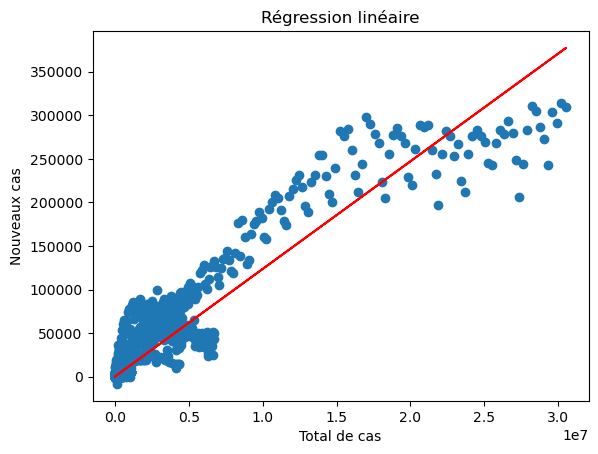

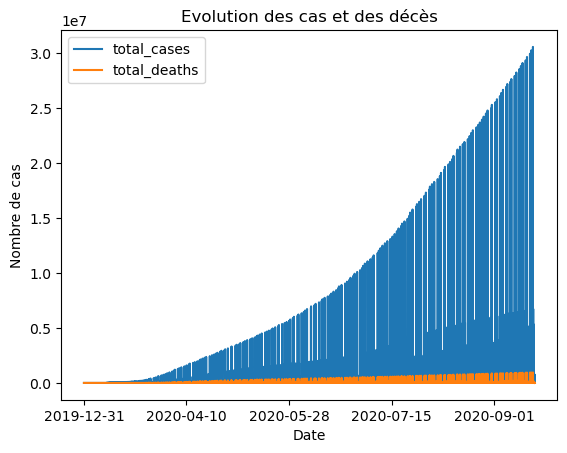

In [127]:
# Préparation des données
df = data_test
df = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']]
df = df.dropna()

# Analyse exploratoire de données
sns.pairplot(df)
plt.show()

# Régression linéaire pour prédire le nombre de cas
X = df[['total_cases']].values
y = df[['new_cases']].values
reg = LinearRegression().fit(X, y)
print('Coefficient de détermination :', reg.score(X, y))
print('Coefficient directeur :', reg.coef_)

# Visualisation des résultats de la régression linéaire
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.xlabel('Total de cas')
plt.ylabel('Nouveaux cas')
plt.title('Régression linéaire')
plt.show()

df_sorted = df.sort_values('date')

# Création d'un graphique pour comparer l'évolution des cas et des décès
df_sorted.plot(x='date', y=['total_cases', 'total_deaths'])
plt.xlabel('Date')
plt.ylabel('Nombre de cas')
plt.title('Evolution des cas et des décès')
plt.show()

In [140]:
data.describe()

total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  2.753350e+05  3.026550e+05        3.013910e+05  2.546350e+05   
mean   5.767156e+06  1.073397e+04        1.077678e+04  8.061661e+04   
std    3.600088e+07  1.030085e+05        1.002455e+05  4.164645e+05   
min    1.000000e+00  0.000000e+00        0.000000e+00  1.000000e+00   
25%    6.565000e+03  0.000000e+00        1.143000e+00  1.210000e+02   
50%    6.239700e+04  1.700000e+01        3.771400e+01  1.230000e+03   
75%    6.419815e+05  5.230000e+02        6.310000e+02  1.064800e+04   
max    7.664400e+08  7.460822e+06        6.410667e+06  6.932578e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  302735.000000        301505.000000            275335.000000   
mean       95.740952            96.103652             88010.375666   
std       600.706338           591.334247            138439.520139   
min         0.000000             0.000000                 0.000000   
25%         0.000000             0.000000              2039.082000   
50%         0.000000             0.286000             20898.389000   
75%         6.000000             6.714000            107810.942500   
max     20027.000000         14677.857000            737554.506000   

       new_cases_per_million  new_cases_smoothed_per_million  \
count          302655.000000                   301391.000000   
mean              161.890445                      162.525589   
std              1127.171598                      634.547240   
min                 0.000000                        0.000000   
25%                 0.000000                        0.246000   
50%                 2.396000                       10.664000   
75%                68.501000                      103.445000   
max            228872.025000                    37241.781000   

       total_deaths_per_million  ...   male_smokers  handwashing_facilities  \
count             254635.000000  ...  178551.000000           118194.000000   
mean                 811.194069  ...      32.910606               50.792130   
std                 1053.772688  ...      13.573867               31.957061   
min                    0.000000  ...       7.700000                1.188000   
25%                   50.398500  ...      22.600000               20.859000   
50%                  338.621000  ...      33.100000               49.839000   
75%                 1246.603000  ...      41.300000               83.241000   
max                 6476.319000  ...      78.100000              100.000000   

       hospital_beds_per_thousand  life_expectancy  human_development_index  \
count               213020.000000    286381.000000            233916.000000   
mean                     3.097389        73.718230                 0.722496   
std                      2.548525         7.397004                 0.148989   
min                      0.100000        53.280000                 0.394000   
25%                      1.300000        69.590000                 0.602000   
50%                      2.500000        75.050000                 0.740000   
75%                      4.200000        79.460000                 0.829000   
max                     13.800000        86.750000                 0.957000   

         population  excess_mortality_cumulative_absolute  \
count  3.114180e+05                          1.066900e+04   
mean   1.282506e+08                          4.739668e+04   
std    6.601426e+08                          1.384241e+05   
min    4.700000e+01                         -3.772610e+04   
25%    4.490020e+05                          2.780000e+01   
50%    5.882259e+06                          4.530999e+03   
75%    2.830170e+07                          3.159700e+04   
max    7.975105e+09                          1.282260e+06   

       excess_mortality_cumulative  excess_mortality  \
count                 10669.000000      10669.000000   
mean                      9.538903         12.633550   
std               

## Avant toutes choses nous voulons savoir comment évolue le taux de mortalité ? En fonction des cas confirmés oui mais pas que, car un cas confirmé n'est pas un décés obligatoire. Et donc qu'est ce qui crée ce taux de mortalité ?
## D'après ces graphes, nous pouvons voir sur quoi partir déjà. En général, plus le nombre de cas total est haut et plus le taux de mortalité est considérable, l'évolution est assez linéaire, voir même exponentielle. Nous pouvons en déduire que ces deux paramètres sont étroitement liés.

## Pour se donner une idée, voici le top 20 des pays ayant eu le plus de cas durant la pandémie :

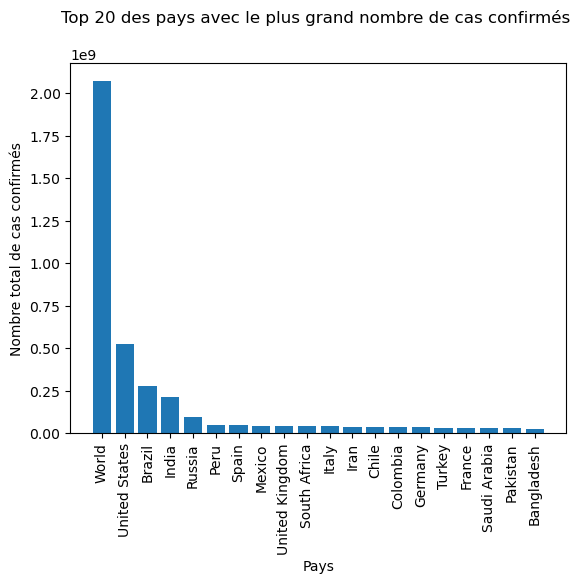

In [95]:
data_pays = data_covid.groupby(['location'])['total_cases'].sum().reset_index().sort_values(by = 'total_cases', ascending = False)
top_20 = data_pays.sort_values('total_cases', ascending=False).head(20)

plt.bar(top_20['location'], top_20['total_cases'])
plt.xticks(rotation=90)
plt.xlabel('Pays')
plt.ylabel('Nombre total de cas confirmés')
plt.title('Top 20 des pays avec le plus grand nombre de cas confirmés \n')
plt.show()

       continent  total_cases  total_deaths  new_cases  new_deaths
3  North America    6724667.0      198589.0    78427.0      4928.0
1           Asia    5308014.0       85619.0    97894.0      2003.0
5  South America    4495183.0      135793.0    69074.0      3935.0
2         Europe    1091186.0       41732.0    27404.0      2004.0
0         Africa     657627.0       15857.0    13944.0       572.0


C:\Users\SunRi\AppData\Local\Temp\ipykernel_106240\1594281205.py:8: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.



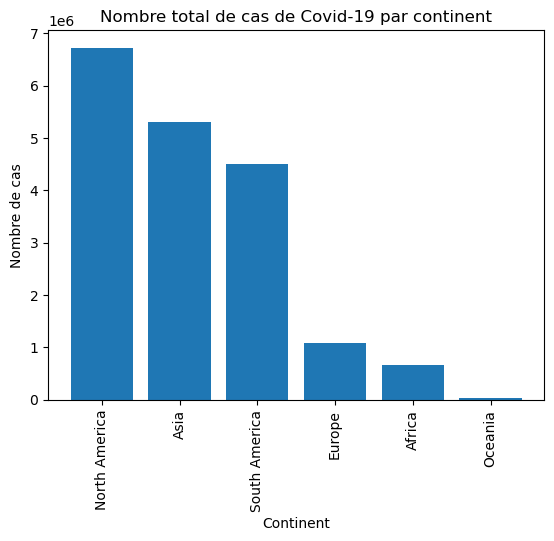

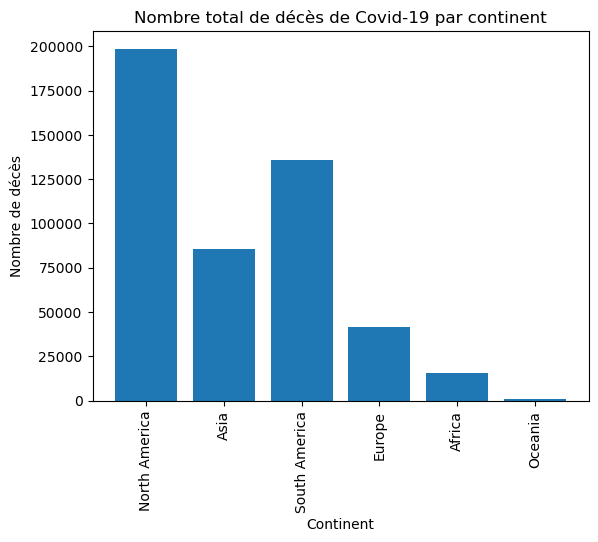

In [96]:
# Création d'une nouvelle colonne pour le nombre de nouveaux cas par jour
data_covid['new_cases'] = data_covid['total_cases'].diff()

# Création d'une nouvelle colonne pour le nombre de nouveaux décès par jour
data_covid['new_deaths'] = data_covid['total_deaths'].diff()

# Groupement des données par pays
data_covid_country = data_covid.groupby(['continent']).max()[['total_cases', 'total_deaths', 'new_cases', 'new_deaths']].reset_index()

# Tri des données par nombre de cas décroissant
data_covid_country = data_covid_country.sort_values(by=['total_cases'], ascending=False)

# Affichage des 5 premières lignes du dataframe
print(data_covid_country.head())

# Graphique du nombre total de cas par pays
plt.bar(data_covid_country['continent'], data_covid_country['total_cases'])
plt.xticks(rotation=90)
plt.xlabel('Continent')
plt.ylabel('Nombre de cas')
plt.title('Nombre total de cas de Covid-19 par continent')
plt.show()

# Graphique du nombre total de décès par pays
plt.bar(data_covid_country['continent'], data_covid_country['total_deaths'])
plt.xticks(rotation=90)
plt.xlabel('Continent')
plt.ylabel('Nombre de décès')
plt.title('Nombre total de décès de Covid-19 par continent')
plt.show()


## On voit bien que le continent d'Amérique du Nord (grossomodo les USA) sont bien au dessus des autres continent. On peux notamment voir que l'Asie a eu beaucoup de cas décelés mais pas beaucoup de mort. Pourquoi ? Ils se sont rapidement mis en confinement strict.
### Pourrais-t-on déjà conclure que les Nord Américains sont les plus gros fumeurs ???

In [117]:
# Importer les données depuis le CSV
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

data["smokers_percent"] = data["female_smokers"] + data["male_smokers"] / 2

# Sélectionner les colonnes pertinentes pour l'analyse
data = data[['location', 'date', 'smokers_percent', 'total_cases', 'total_deaths']]

# Retirer les lignes contenant des valeurs manquantes
data.dropna(inplace=True)

# Calculer le taux de mortalité pour chaque pays
data['case_fatality_rate'] = data['total_deaths'] / data['total_cases']

# Convertir la colonne date en type datetime
data['date'] = pd.to_datetime(data['date'])

# Créer une liste des pays uniques dans les données
countries = sorted(data['location'].unique())

# Créer une liste des mois uniques dans les données
months = sorted(data['date'].dt.to_period('M').unique())

# Créer un widget de sélection de pays
country_dropdown = widgets.Dropdown(
    options=countries,
    value=countries[0],
    description='Pays:'
)

# Créer un widget de sélection de date
month_dropdown = widgets.Dropdown(
    options=months,
    value=months[-1],
    description='Mois:'
)

# Fonction de mise à jour du graphique en fonction du pays et du mois sélectionnés
def update_graph(country, month):
    filtered_data = data[(data['location'] == country) & (data['date'].dt.to_period('M') == month)]
    
    fig = go.Figure()
    fig.add_trace(go.Box(
    x=filtered_data['smokers_percent'],
    y=filtered_data['case_fatality_rate'] * 1000,  # Multiplier par 1000 pour afficher en pourcentage
    text=filtered_data['location'],
    hovertemplate='Pourcentage de fumeurs: %{x}<br>Taux de mortalité: %{y:.2f}%<br>Pays: %{text}',
    marker=dict(color='blue'),
    boxpoints=False
))
    
    fig.update_layout(
        title='Taux de mortalité en fonction du pourcentage de fumeurs - {} ({})'.format(country, month),
        xaxis=dict(title='Pourcentage de fumeurs dans la population'),
        yaxis=dict(title='Taux de mortalité')
    )
    
    fig.show()

# Créer un widget interactif pour la mise à jour du graphique
interactive_widget = widgets.interactive_output(update_graph, {'country': country_dropdown, 'month': month_dropdown})

# Afficher les widgets et le graphique initial
display(country_dropdown, month_dropdown, interactive_widget)

Dropdown(description='Pays:', options=('Albania', 'Algeria', 'Andorra', 'Argentina', 'Armenia', 'Australia', '…

Dropdown(description='Mois:', index=40, options=(Period('2020-01', 'M'), Period('2020-02', 'M'), Period('2020-…

Output()

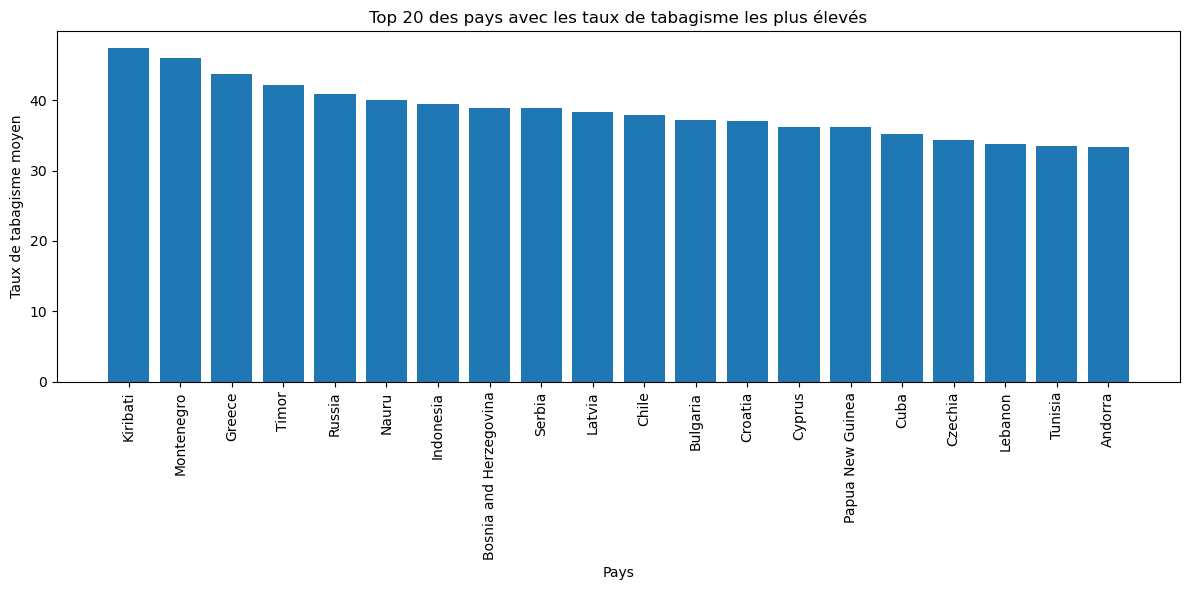

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le dataset CSV
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# Sélectionner les colonnes pertinentes
df = df[['location', 'male_smokers', 'female_smokers']]

# Grouper les données par pays et calculer la moyenne des taux de tabagisme
df = df.groupby('location').mean()

# Calculer la moyenne totale des taux de tabagisme
df['total_smokers'] = df[['male_smokers', 'female_smokers']].mean(axis=1)

# Trier les pays par la moyenne totale des taux de tabagisme en ordre décroissant
df = df.sort_values('total_smokers', ascending=False)

# Sélectionner les 20 premiers pays avec les taux de tabagisme les plus élevés
top_20_countries = df.head(20)

# Créer le graphique à barres
plt.figure(figsize=(12, 6))
plt.bar(top_20_countries.index, top_20_countries['total_smokers'])
plt.xticks(rotation=90)
plt.xlabel('Pays')
plt.ylabel('Taux de tabagisme moyen')
plt.title('Top 20 des pays avec les taux de tabagisme les plus élevés')
plt.tight_layout()

# Afficher le graphique
plt.show()

## Ici AUCUN pays d'Amérique du Nord n'apparait dans le top 20. Nous pouvons donc déjà nous faire une idée.

In [139]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Filtrer les données par pays et date
filtered_data = data_covid[['continent', 'location', 'date', 'total_cases']].copy()

# Convertir la colonne 'date' en format de date
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Extraire les mois et les années uniques dans les données
months = sorted(filtered_data['date'].dt.month.unique())
years = sorted(filtered_data['date'].dt.year.unique())

# Créer des widgets de sélection pour le mois et l'année
month_dropdown = widgets.Dropdown(
    options=months,
    value=months[-1],  # Sélectionner le dernier mois par défaut
    description='Mois:',
    style={'description_width': 'initial'}
)

year_dropdown = widgets.Dropdown(
    options=years,
    value=years[-1],  # Sélectionner la dernière année par défaut
    description='Année:',
    style={'description_width': 'initial'}
)

# Fonction de mise à jour du graphique en fonction du mois et de l'année sélectionnés
def update_graph(month, year):
    filtered_data_month_year = filtered_data[(filtered_data['date'].dt.month == month) & (filtered_data['date'].dt.year == year)]
    fig = px.choropleth(filtered_data_month_year, 
                        locations='location', 
                        locationmode='country names',
                        color='total_cases',
                        hover_name='location',
                        hover_data=['total_cases'],
                        color_continuous_scale='YlOrRd',
                        title='Nombre total de cas par pays')
    fig.show()

# Lier la mise à jour du graphique aux valeurs des menus déroulants du mois et de l'année
widgets.interact(update_graph, month=month_dropdown, year=year_dropdown)

interactive(children=(Dropdown(description='Mois:', index=11, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),…

<function __main__.update_graph(month, year)>

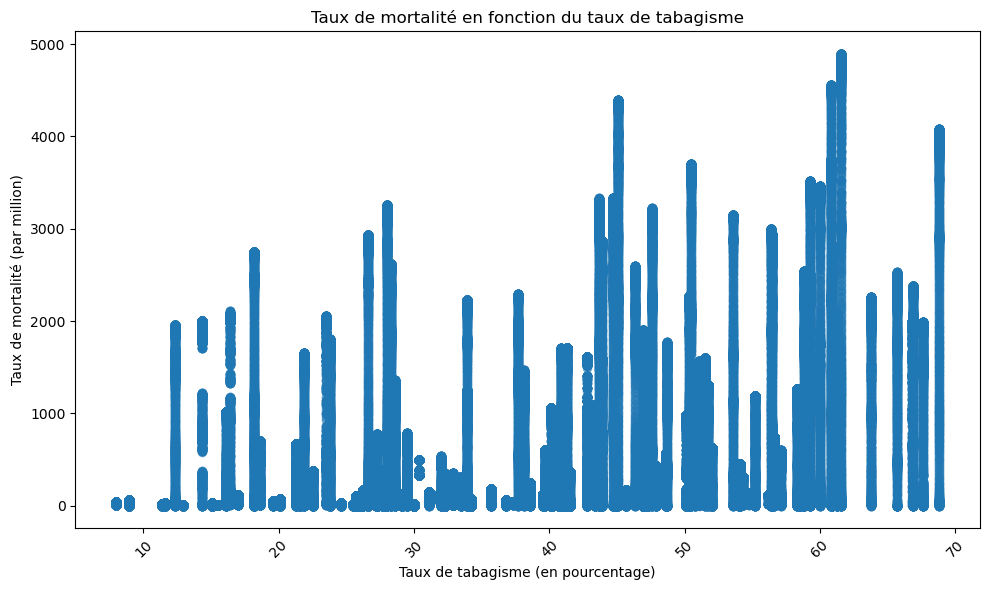

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le jeu de données
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# Filtrer les données pour inclure uniquement les variables pertinentes (taux de mortalité et taux de tabagisme)
filtered_data = data[['location', 'total_deaths_per_million', 'female_smokers', 'male_smokers']]

# Supprimer les lignes avec des valeurs manquantes
filtered_data = filtered_data.dropna()

# Création d'une colonne pour le taux de tabagisme global
filtered_data['overall_smokers'] = filtered_data['female_smokers'] + filtered_data['male_smokers']

# Supprimer les pays avec des valeurs aberrantes pour une meilleure visualisation
filtered_data = filtered_data[filtered_data['overall_smokers'] <= 70]

# Graphique - Taux de mortalité en fonction du taux de tabagisme
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['overall_smokers'], filtered_data['total_deaths_per_million'], alpha=0.5)
plt.xlabel('Taux de tabagisme (en pourcentage)')
plt.ylabel('Taux de mortalité (par million)')
plt.title('Taux de mortalité en fonction du taux de tabagisme')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# On peux voir qu'il y a quand même une petite influence car plus le taux de tabagisme est haut et plus le taux de mortalité est haut aussi mais cela reste léger. 
## Peut-on accuser un autre facteur : Maladie cardiovasculaire ? Diabete ? Asthme ? Vieillesse ?

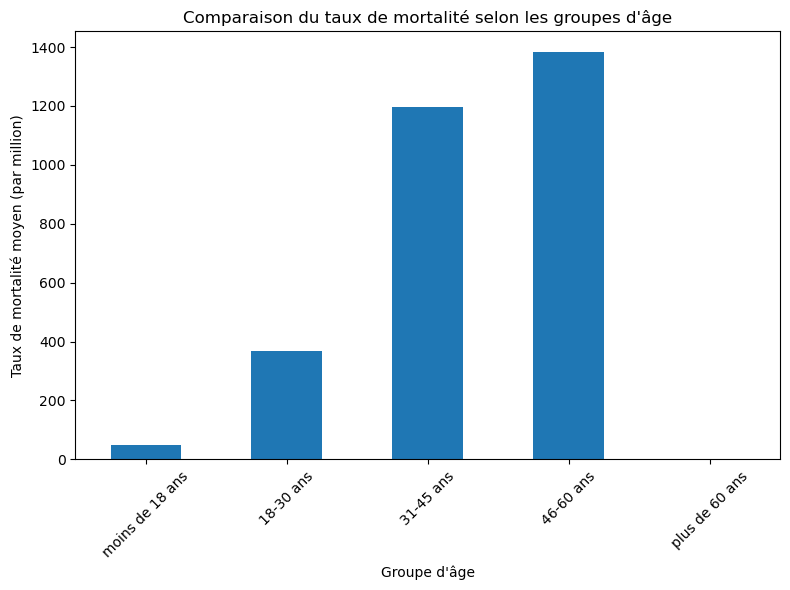

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le jeu de données
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# Filtrer les données pour inclure uniquement les variables pertinentes (taux de mortalité et taux de tabagisme)
filtered_data = data[['location', 'total_deaths_per_million', 'female_smokers', 'male_smokers', 'median_age']]

# Supprimer les lignes avec des valeurs manquantes
filtered_data = filtered_data.dropna()

# Création des groupes d'âge
bins = [0, 18, 30, 45, 60, 200]
labels = ['moins de 18 ans', '18-30 ans', '31-45 ans', '46-60 ans', 'plus de 60 ans']
filtered_data['age_group'] = pd.cut(filtered_data['median_age'], bins=bins, labels=labels)

# Graphique 2 - Répartition des décès par groupe d'âge
age_group_deaths = filtered_data.groupby('age_group')['total_deaths_per_million'].mean()
plt.figure(figsize=(8, 6))
age_group_deaths.plot(kind='bar')
plt.xlabel('Groupe d\'âge')
plt.ylabel('Taux de mortalité moyen (par million)')
plt.title('Comparaison du taux de mortalité selon les groupes d\'âge')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

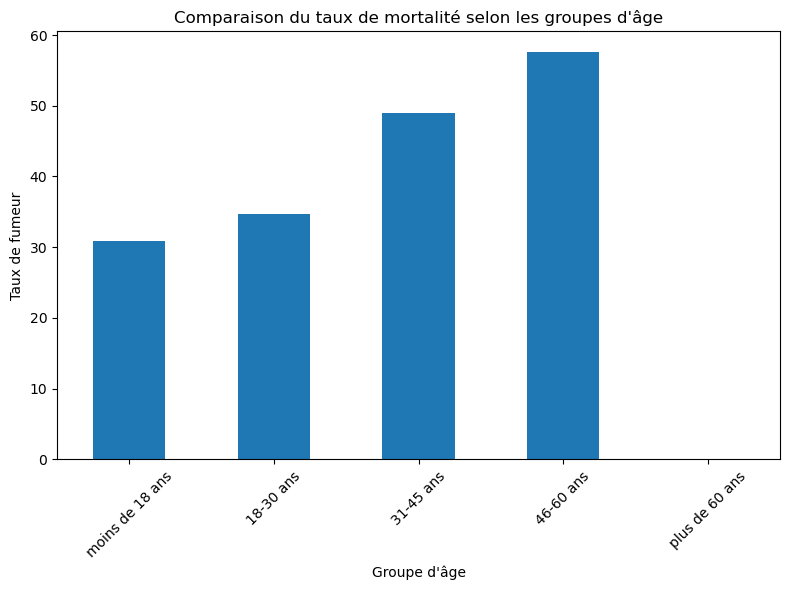

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le jeu de données
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

# Filtrer les données pour inclure uniquement les variables pertinentes (taux de mortalité et taux de tabagisme)
filtered_data = data[['location', 'total_deaths_per_million', 'female_smokers', 'male_smokers', 'median_age']]

# Supprimer les lignes avec des valeurs manquantes
filtered_data = filtered_data.dropna()

# Création d'une colonne pour le taux de tabagisme global
filtered_data['overall_smokers'] = filtered_data['female_smokers'] + filtered_data['male_smokers']

# Création des groupes d'âge
bins = [0, 18, 30, 45, 60, 200]
labels = ['moins de 18 ans', '18-30 ans', '31-45 ans', '46-60 ans', 'plus de 60 ans']
filtered_data['age_group'] = pd.cut(filtered_data['median_age'], bins=bins, labels=labels)

# Graphique 2 - Répartition des décès par groupe d'âge
age_group_deaths = filtered_data.groupby('age_group')['overall_smokers'].mean()
plt.figure(figsize=(8, 6))
age_group_deaths.plot(kind='bar')
plt.xlabel('Groupe d\'âge')
plt.ylabel('Taux de fumeur')
plt.title('Comparaison du taux de mortalité selon les groupes d\'âge')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Notre analyse montre que le taux de tabagisme n'est qu'un facteur minime du taux de mortalité. D'après ces 2 graphes l'age joue beaucoup sur le taux de mortalité aussi. Un fumeur agés à plus de chance de décéder qu'un non fumeur.

In [118]:
# Importer les données depuis le CSV
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')



# Sélectionner les colonnes pertinentes pour l'analyse
data = data[['location', 'date', 'cardiovasc_death_rate', 'total_cases', 'total_deaths']]

# Retirer les lignes contenant des valeurs manquantes
data.dropna(inplace=True)

# Calculer le taux de mortalité pour chaque pays
data['case_fatality_rate'] = data['total_deaths'] / data['total_cases']

# Convertir la colonne date en type datetime
data['date'] = pd.to_datetime(data['date'])

# Créer une liste des pays uniques dans les données
countries = sorted(data['location'].unique())

# Créer une liste des mois uniques dans les données
months = sorted(data['date'].dt.to_period('M').unique())

# Créer un widget de sélection de pays
country_dropdown = widgets.Dropdown(
    options=countries,
    value=countries[0],
    description='Pays:'
)

# Créer un widget de sélection de date
month_dropdown = widgets.Dropdown(
    options=months,
    value=months[-1],
    description='Mois:'
)

# Fonction de mise à jour du graphique en fonction du pays et du mois sélectionnés
def update_graph(country, month):
    filtered_data = data[(data['location'] == country) & (data['date'].dt.to_period('M') == month)]
    
    fig = go.Figure()
    fig.add_trace(go.Box(
    x=filtered_data['cardiovasc_death_rate'] / 10,
    y=filtered_data['case_fatality_rate'] * 1000,  # Multiplier par 1000 pour afficher en pourcentage
    text=filtered_data['location'],
    hovertemplate='Pourcentage de fumeurs: %{x}<br>Taux de mortalité: %{y:.2f}%<br>Pays: %{text}',
    marker=dict(color='blue'),
    boxpoints=False
))
    
    fig.update_layout(
        title='Taux de mortalité en fonction du pourcentage de malade cardiovasculaire - {} ({})'.format(country, month),
        xaxis=dict(title='Pourcentage de patients ayant une maladie cardiovasculaire'),
        yaxis=dict(title='Taux de mortalité')
    )
    
    fig.show()

# Créer un widget interactif pour la mise à jour du graphique
interactive_widget = widgets.interactive_output(update_graph, {'country': country_dropdown, 'month': month_dropdown})

# Afficher les widgets et le graphique initial
display(country_dropdown, month_dropdown, interactive_widget)

Dropdown(description='Pays:', options=('Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Ango…

Dropdown(description='Mois:', index=40, options=(Period('2020-01', 'M'), Period('2020-02', 'M'), Period('2020-…

Output()

In [116]:
# Importer les données depuis le CSV
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')



# Sélectionner les colonnes pertinentes pour l'analyse
data = data[['location', 'date', 'diabetes_prevalence', 'total_cases', 'total_deaths']]

# Retirer les lignes contenant des valeurs manquantes
data.dropna(inplace=True)

# Calculer le taux de mortalité pour chaque pays
data['case_fatality_rate'] = data['total_deaths'] / data['total_cases']

# Convertir la colonne date en type datetime
data['date'] = pd.to_datetime(data['date'])

# Créer une liste des pays uniques dans les données
countries = sorted(data['location'].unique())

# Créer une liste des mois uniques dans les données
months = sorted(data['date'].dt.to_period('M').unique())

# Créer un widget de sélection de pays
country_dropdown = widgets.Dropdown(
    options=countries,
    value=countries[0],
    description='Pays:'
)

# Créer un widget de sélection de date
month_dropdown = widgets.Dropdown(
    options=months,
    value=months[-1],
    description='Mois:'
)

# Fonction de mise à jour du graphique en fonction du pays et du mois sélectionnés
def update_graph(country, month):
    filtered_data = data[(data['location'] == country) & (data['date'].dt.to_period('M') == month)]
    
    fig = go.Figure()
    fig.add_trace(go.Box(
    x=filtered_data['diabetes_prevalence'] / 10,
    y=filtered_data['case_fatality_rate'] * 1000,  # Multiplier par 1000 pour afficher en pourcentage
    text=filtered_data['location'],
    hovertemplate='Pourcentage de patient diabétique: %{x}<br>Taux de mortalité: %{y:.2f}%<br>Pays: %{text}',
    marker=dict(color='blue'),
    boxpoints=False
))
    
    fig.update_layout(
        title='Taux de mortalité en fonction du pourcentage de patients diabétiques - {} ({})'.format(country, month),
        xaxis=dict(title='Pourcentage de patients diabétiques'),
        yaxis=dict(title='Taux de mortalité')
    )
    
    fig.show()

# Créer un widget interactif pour la mise à jour du graphique
interactive_widget = widgets.interactive_output(update_graph, {'country': country_dropdown, 'month': month_dropdown})

# Afficher les widgets et le graphique initial
display(country_dropdown, month_dropdown, interactive_widget)

Dropdown(description='Pays:', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and …

Dropdown(description='Mois:', index=40, options=(Period('2020-01', 'M'), Period('2020-02', 'M'), Period('2020-…

Output()

# Pour finir, nous voyons que même si le taux de patients atteints de maladie cardiovasculaire est plus faible que le taux de fumeurs la valeur de la médiane cardiovasculaire est assez élevé et correspond à 33% de ce taux contrairement au graphique précédent.